<a name = "content"> </a>
# Сборный проект
Оглавление:

----

## [1. Откройте файл и изучите общую информацию](#step1)

## [2. Подготовьте данные](#step2)


*   [Замените названия стобцов;](#step2_1)


*   [Преобразуйте данные в нужные типы. Опишите, в каких стобцах заменили тип данных и почему;](#step2_2)


*   [Обработайте пропуски при необходимости:](#step2_3)
    *  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

    *  Опишите причины, которые могли привести к пропускам;

    *  Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение

*   [Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.](#step2_4)



## [3. Проведите исследовательский анализ данных](#step3)



*   [Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды](#step3_1)

*   [Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?](#step3_2)

* [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#step3_3)

* [Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.](#step3_4)

* [Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.](#step3_5)

* [Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#step3_6)

## [4. Составьте портрет пользователя каждого региона](#step4)

*  [Самые популярные платформы (топ-5). Опишите различия в доля продаж.](#step4_1)

* [Самые популярные жанры (топ-5). Поясните разницу.](#step4_2)

* [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#step4_3)

## [5. Проведите исследование статистических показателей](#step5)

* Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

## [6. Проверка гипотез](#step6)

* [Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;](#step6_1)

* [Средние пользовательские рейтинги жанров *Action* и *Sports* разные.](#step6_2)

Задайте самостоятельно пороговое значение $\alpha$.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий примениили для проверки гипотез и почему

## [7. Напишите общий вывод](#step7)
-----------

# Шаг 0. Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from datetime import datetime
import seaborn as sns

<a name = "step1"></a>
# Шаг 1. Открываем файл, знакомимся с общей информацией

In [2]:
data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# погружаемся глубже в данные
print("Количество столбцов:", len(data.columns))
print(data.columns)
data.describe()

Количество столбцов: 11
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
#поищем null и дупликаты в данных
data.isna().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data.duplicated().sum()

0

Нет дупликатов, что несколько упрощает работу. Однако много пустых значений (особенно в столбцах: *Critic_Score*, *User_Score*, *Raiting*, *Year_of_Release*). Перейдем к шагу 2.

<a name = "step2"> </a>

# Шаг 2. Подготовим данные 


[К оглавлению](#content)

<a name = "step2_1"></a>

Приведем названия столбцов к нижнему регистру

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a name = "step2_2"></a>

Преобразуем данные в нужные типы

In [8]:
for column in data.columns:
    print(column, "| is", data[column].dtype)

name | is object
platform | is object
year_of_release | is float64
genre | is object
na_sales | is float64
eu_sales | is float64
jp_sales | is float64
other_sales | is float64
critic_score | is float64
user_score | is object
rating | is object


In [9]:
print(data['year_of_release'].isna().sum(), ":", len(data))
data['year_of_release'].unique()

269 : 16715


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

<a name = "step2_3"></a>
269 строк с пустым значением года. В принципе, это не так много и за неимением каких-то аномальных выбросов, вполне закономерно можно выкинуть nan-values. Как и для стобцов Name, Genre. Для стобцов с оценками такой трюк не сработает, поскольку в них пропусков на половину выборки. Если заполнить пропуски (нулями - совсем плохая идея, потому что заполнение пропусков может смешаться с действительной оценкой 0, либо отрицательным числом - это более адекватно), то с большой вероятностью получим некорректные результаты в статистическом анализе. Предлагаю проигнорировать. 

In [10]:
data.dropna(subset = ['year_of_release', 'name', 'genre'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Теперь имеем возможность привести год к значению int. Можно привести и к datetime, но критического в игнорировании этого факта я не вижу.

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)

Пора обратить внимание на оценки. "tbd" в столбце user_score предлагаю для приведения к типу float перевести в nan-value. Именно этот физический смысл оно и исполняет. 

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)
for column in data.columns:
    print(column, "| is", data[column].dtype)

name | is object
platform | is object
year_of_release | is int64
genre | is object
na_sales | is float64
eu_sales | is float64
jp_sales | is float64
other_sales | is float64
critic_score | is float64
user_score | is float64
rating | is object


<a name = step2_4 ></a>
Рассчет суммарных продаж во всех регионах. Внесение в отдельный столбец

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] 
+ data['jp_sales'] + data['other_sales']
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,70.32
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,32.66
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,28.44


<a name = "step3"> </a>

# Шаг 3. Исследовательский анализ данных


[К оглавлению](#content)

<a name = "step3_1"> </a>

Сколько игр было выпущено в каждый год:

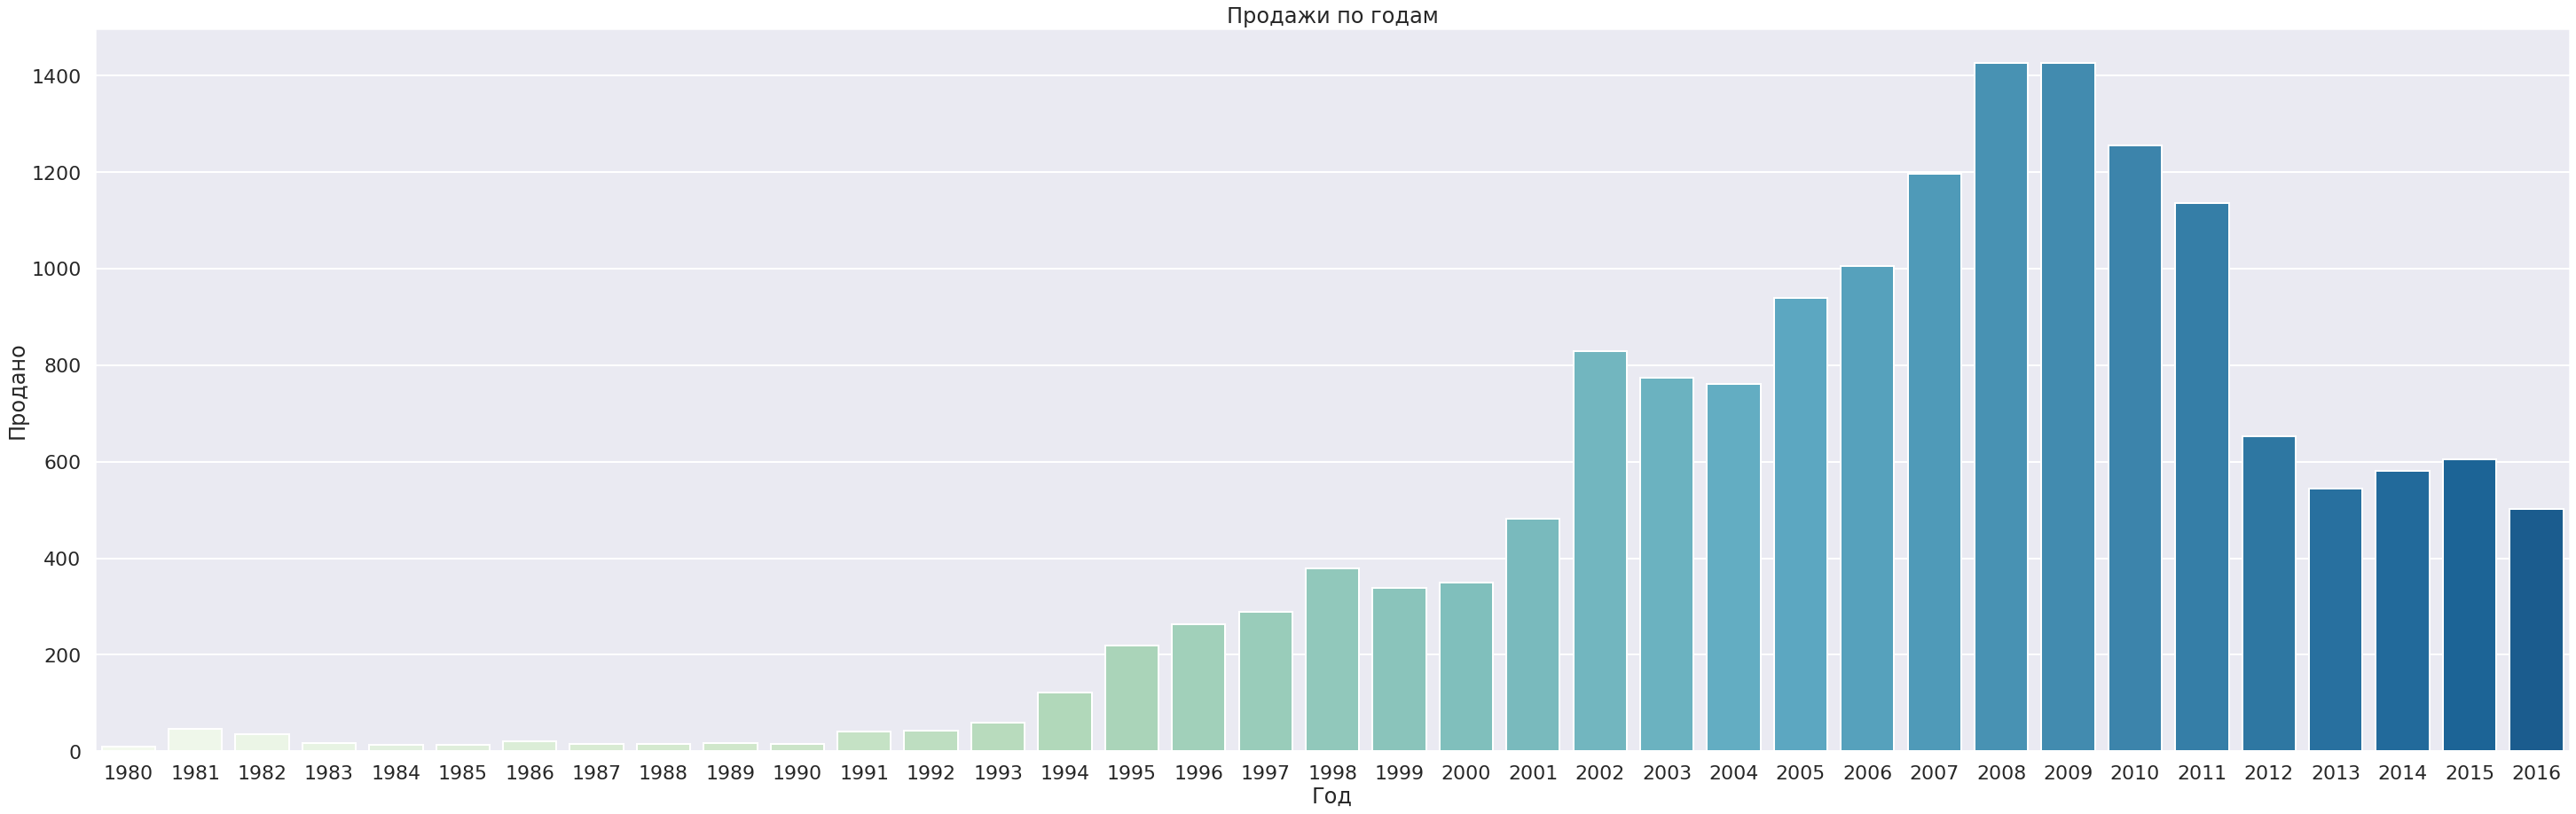

In [14]:
sns.set_style('darkgrid')
sns.set_context("poster")
plt.figure(figsize=(50, 15))
sns.countplot(data = data, x = "year_of_release", 
              palette=sns.color_palette("GnBu",40))
plt.title('Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продано')
print()

Медленный, нестабильный рост в первую декаду развития индустрии. Следующая декада рост более выраженный. Самый большой рост до 2009 года (в который достигается пик роста). Затем начинается спад

<a name = "step3_2"> </a>
Продажи по платформам. Распределение по годам. Поиск популярных в прошлом платформ, у которых сейчас продажи на нуле. Поиск характерного периода, за который появляются новые и исчезают старые платформы.

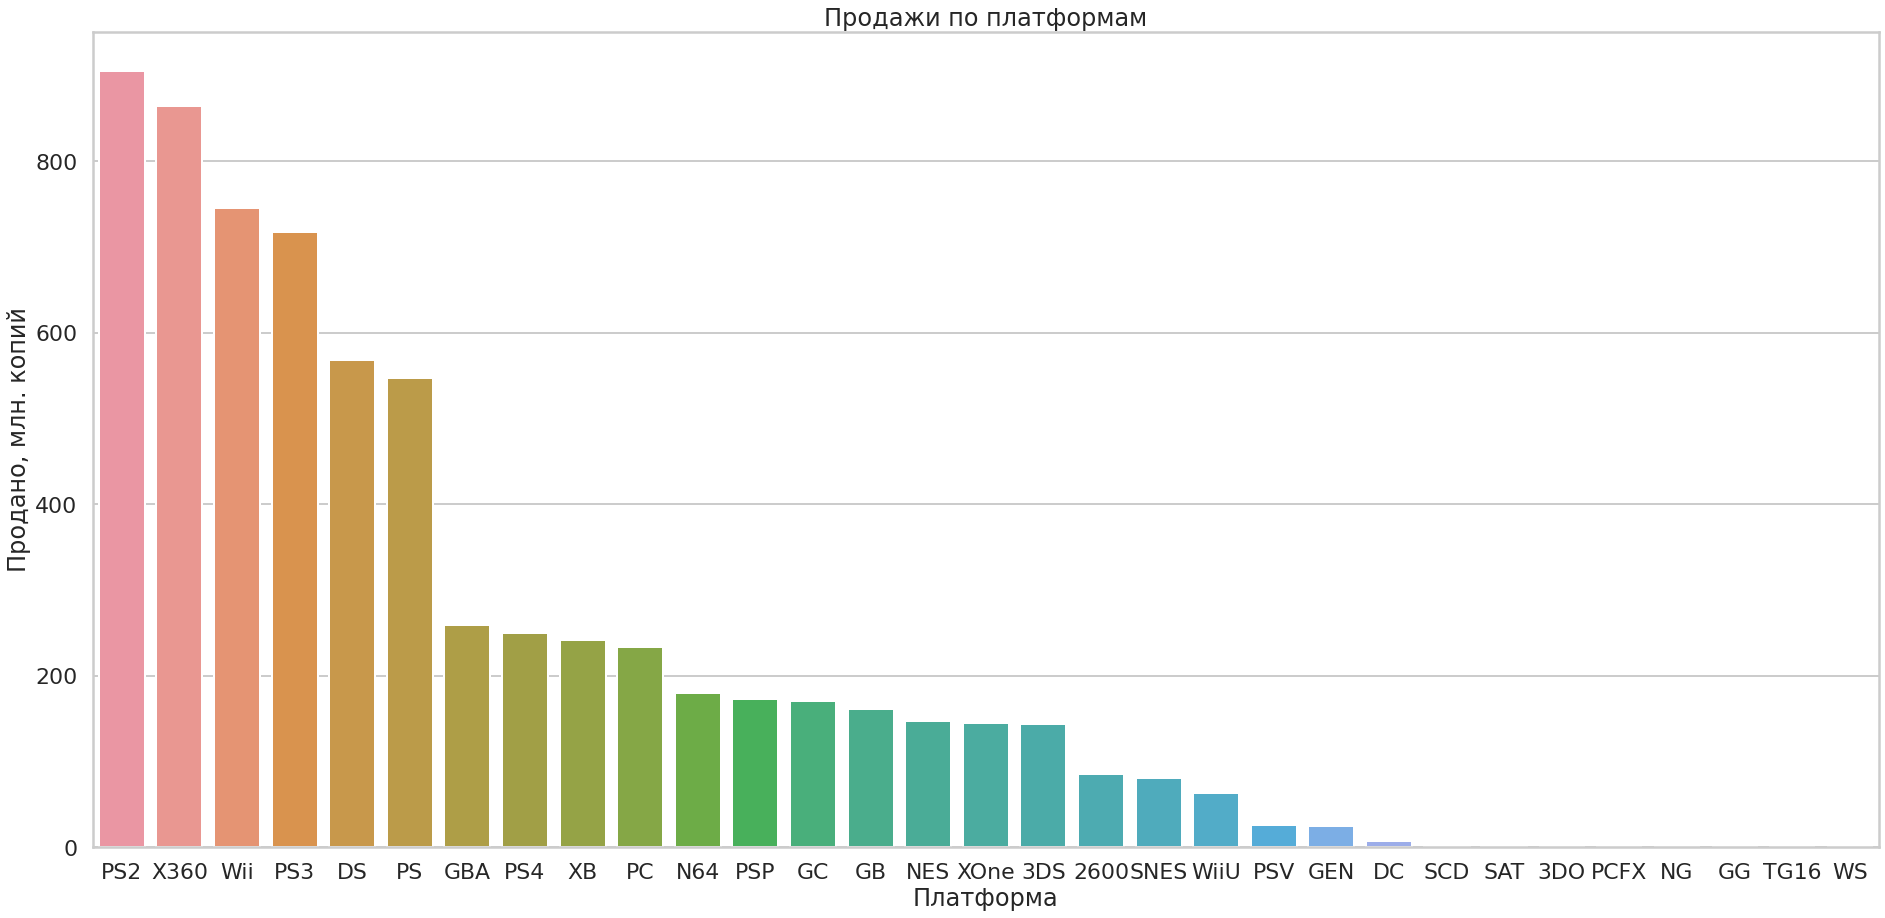

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(32, 15))
top = data.pivot_table(index = 'platform',
                       values = 'total_sales',
                       aggfunc = 'sum').sort_values(
                           by = 'total_sales', ascending = False) 

#sns.barplot(data = data, x='total_sales', y='platform')
sns.barplot(x = top.index, y = top['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продано, млн. копий')
print()

Топ платформы: PS2, X360, Wii, PS3, DS

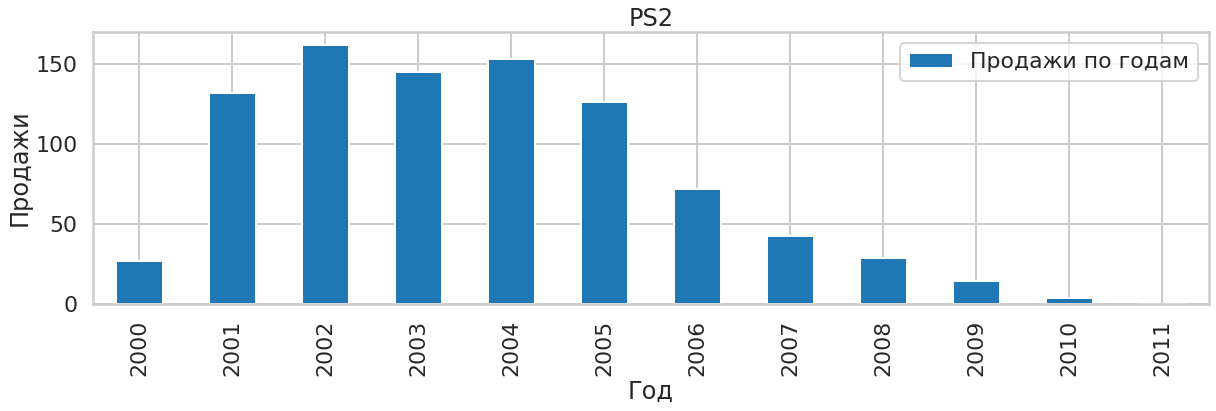

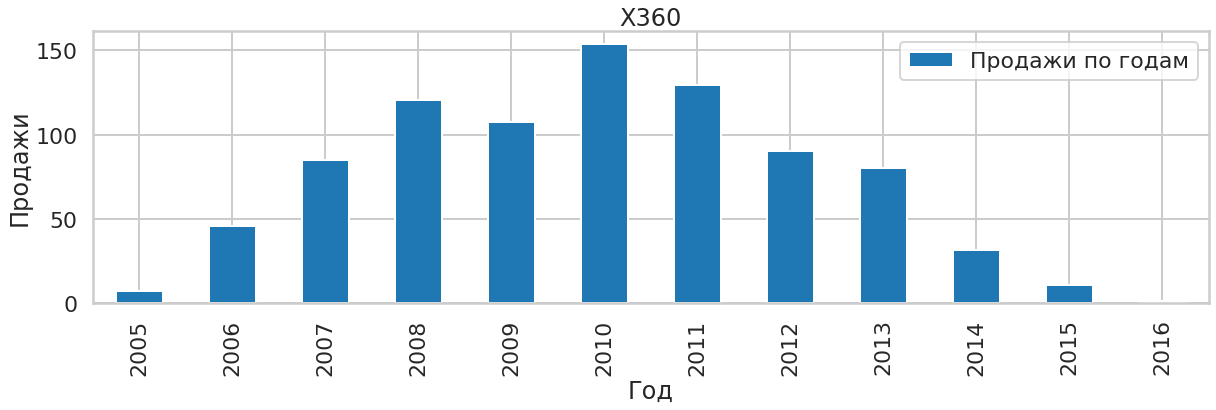

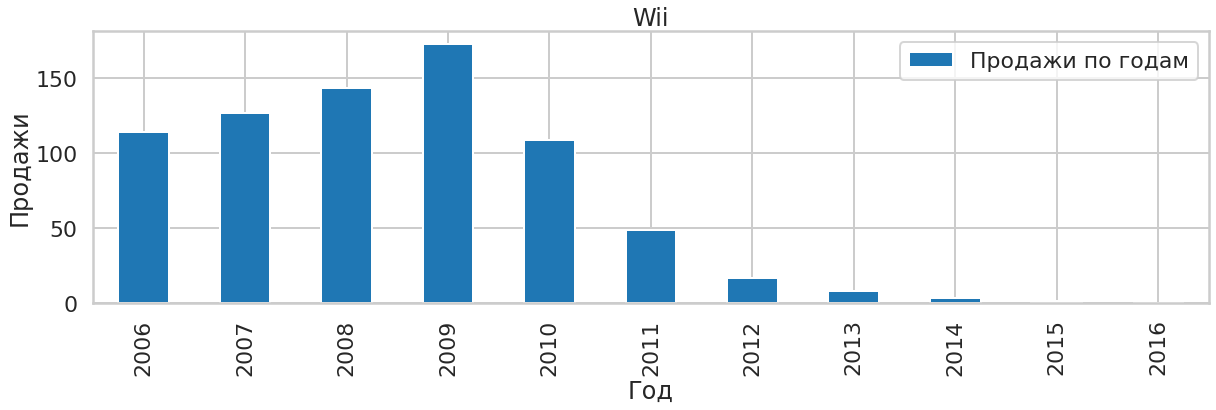

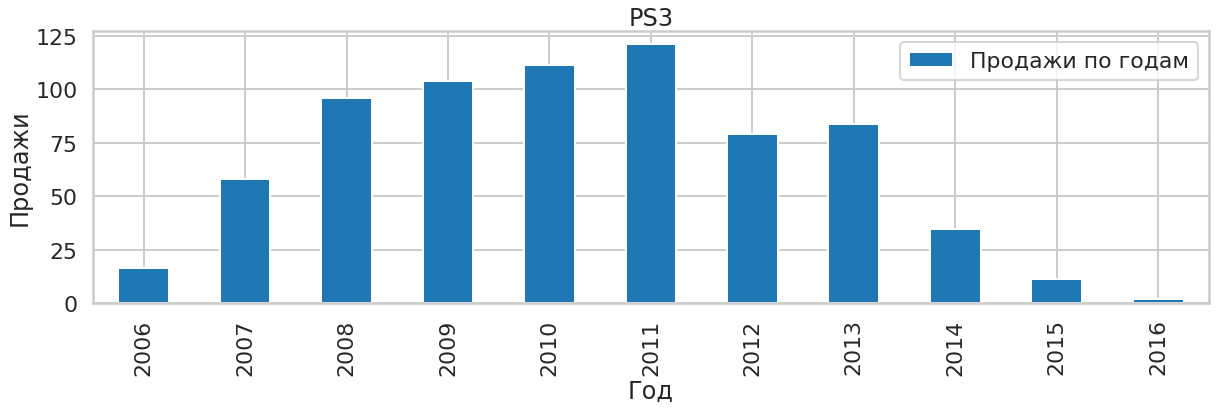

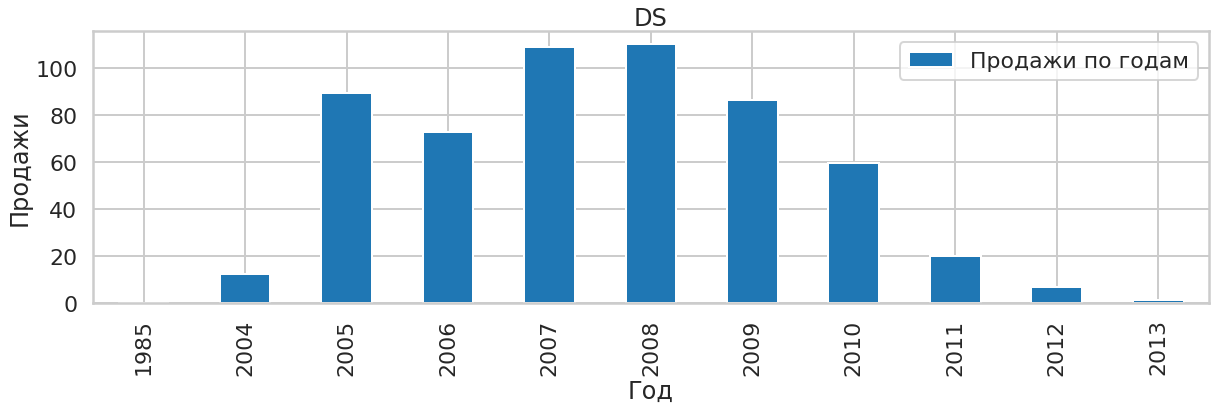

In [16]:
for platform in (top.head().reset_index())['platform'].unique():
  data[data['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', figsize = (20,5))
  plt.title(platform)
  plt.xlabel('Год')
  plt.ylabel('Продажи')
  plt.legend(["Продажи по годам"])
                                                                       

<a name = "step3_3"></a>
Жизнь платформ около 10 лет. На гистограмах видно, что, например, Wii быстро взлетела, но так же быстро умерла, PS2 дольше всех была на высоте, остальные распределены похоже друг на друга. Возьмем последние 10 лет и посмотрим, выберем потенциально прибыльные платформы.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ =

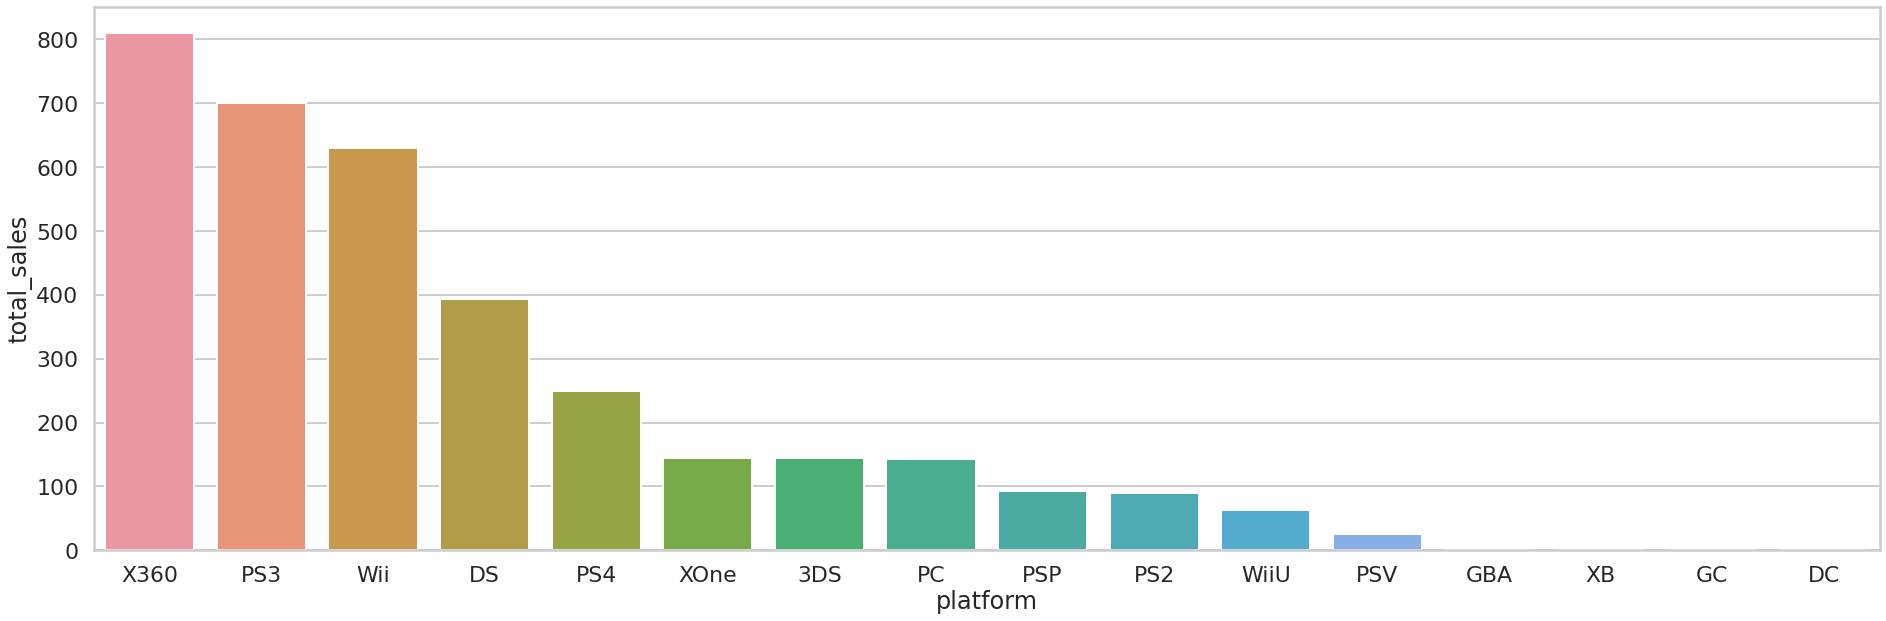

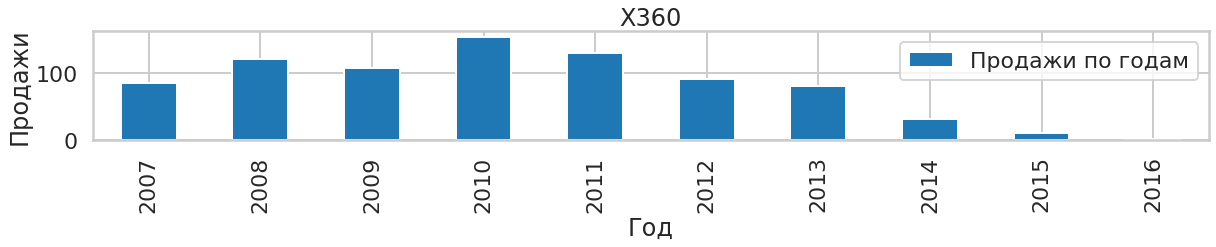

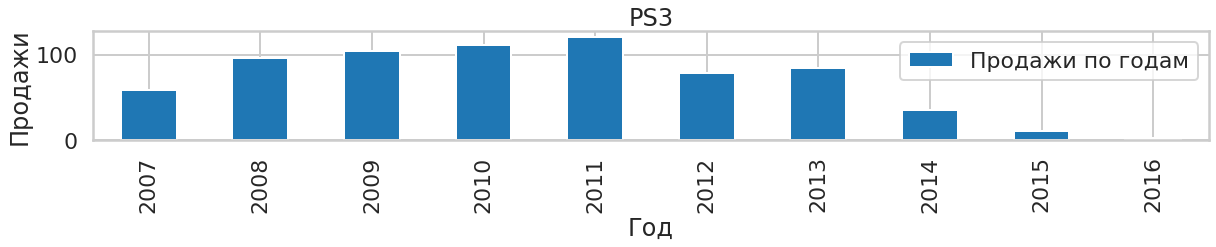

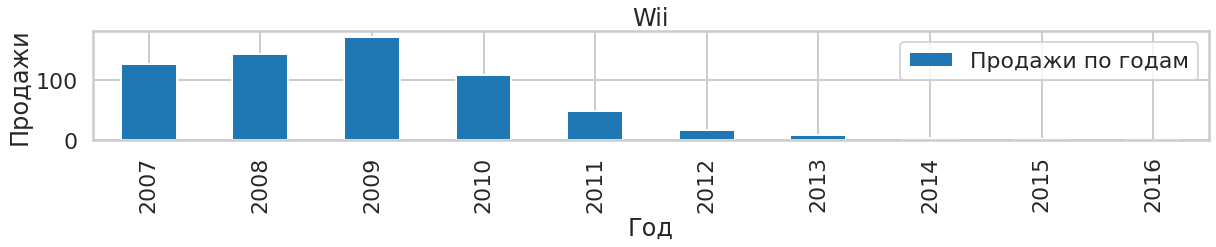

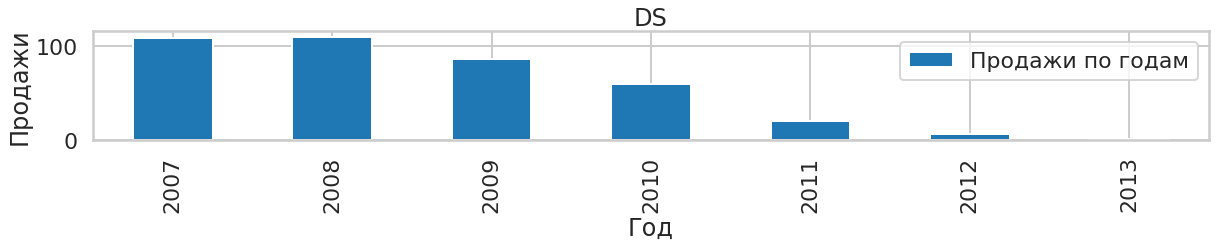

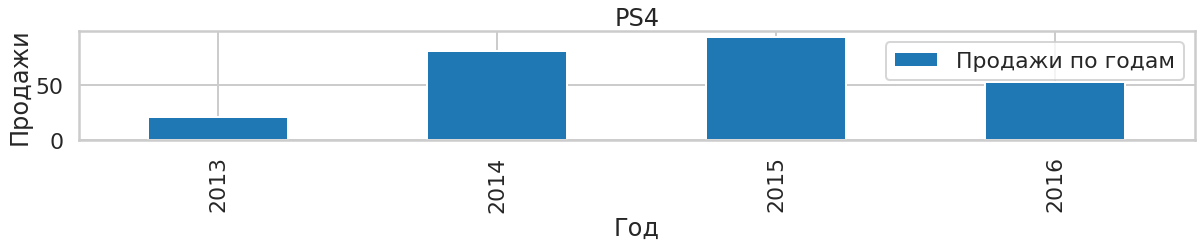

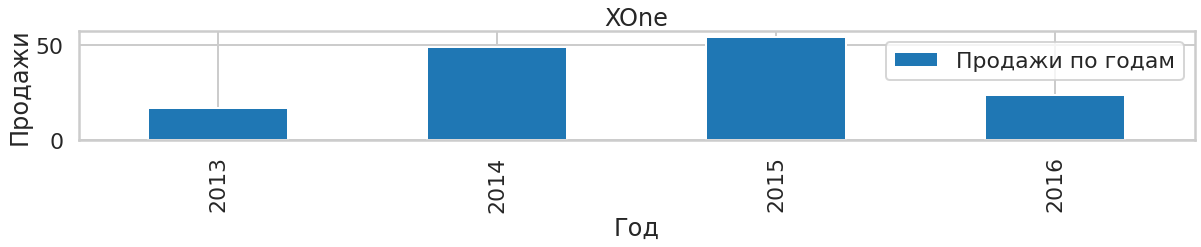

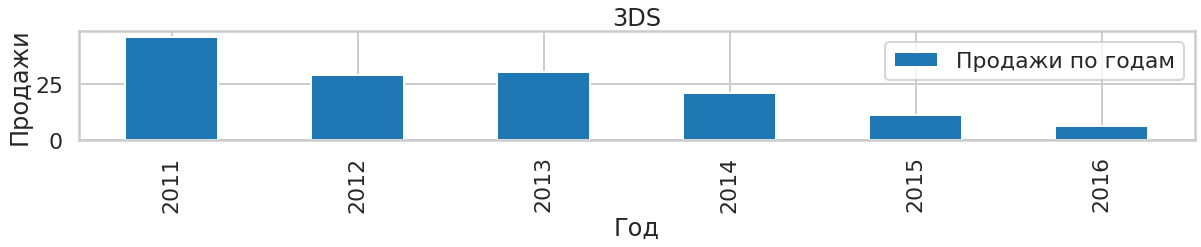

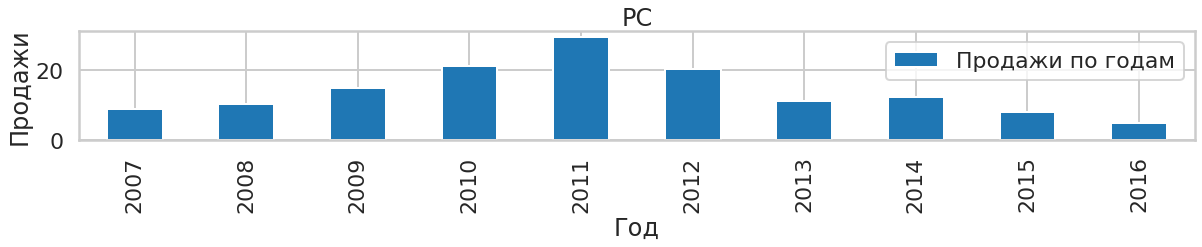

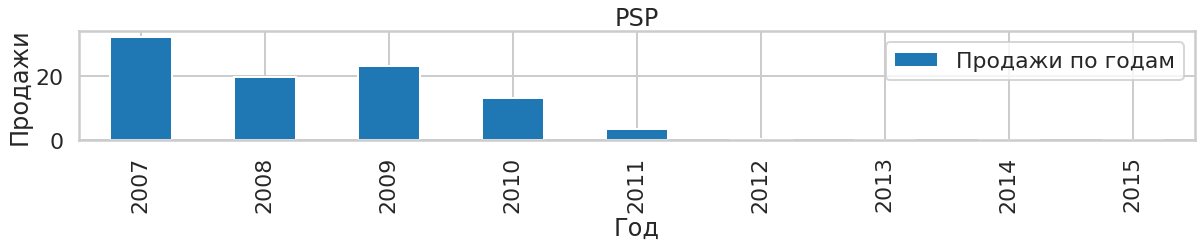

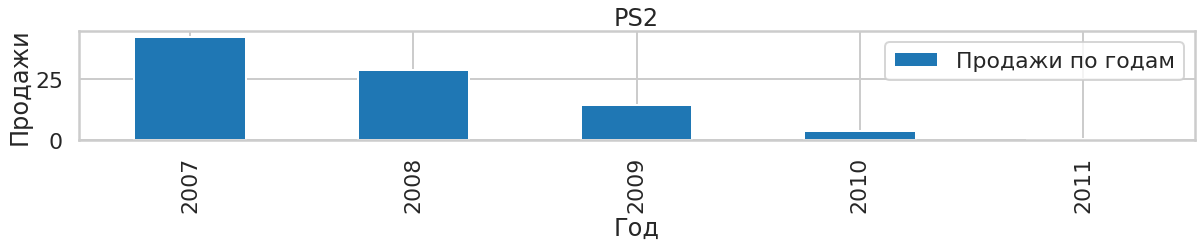

In [51]:
last_decade = data.query('year_of_release > 2006').pivot_table(index = ['platform'], 
                                                values = 'total_sales', 
                                                aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending = False)

plt.figure(figsize=(32, 10))
sns.barplot(data = last_decade, x = 'platform', y = 'total_sales')  

for platform in last_decade.head(10)['platform'].unique():
  (data.query('year_of_release > 2006'))[data['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', figsize = (20,2))
  plt.title(platform)
  plt.xlabel('Год')
  plt.ylabel('Продажи')
  plt.legend(["Продажи по годам"])                                               

Растущие, будущие гиганты - PS4, XOne, 3DS. Стабильные показатели у PC. PSP, PS2, DS, Wii уже не первый год испытывают проблемы. PS3 и X360 заканчивают свою декаду.

<a name = "step3_4"></a>
Построения "ящика с усами" по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описание

In [68]:
list_top = []
for platform in top.head().index:
  list_top.append(platform)
top_data = data[data['platform'].isin(list_top)]
top_data['total_sales'].describe()

count    8072.000000
mean        0.470870
std         1.450947
min         0.000000
25%         0.040000
50%         0.150000
75%         0.420000
max        70.320000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продано')

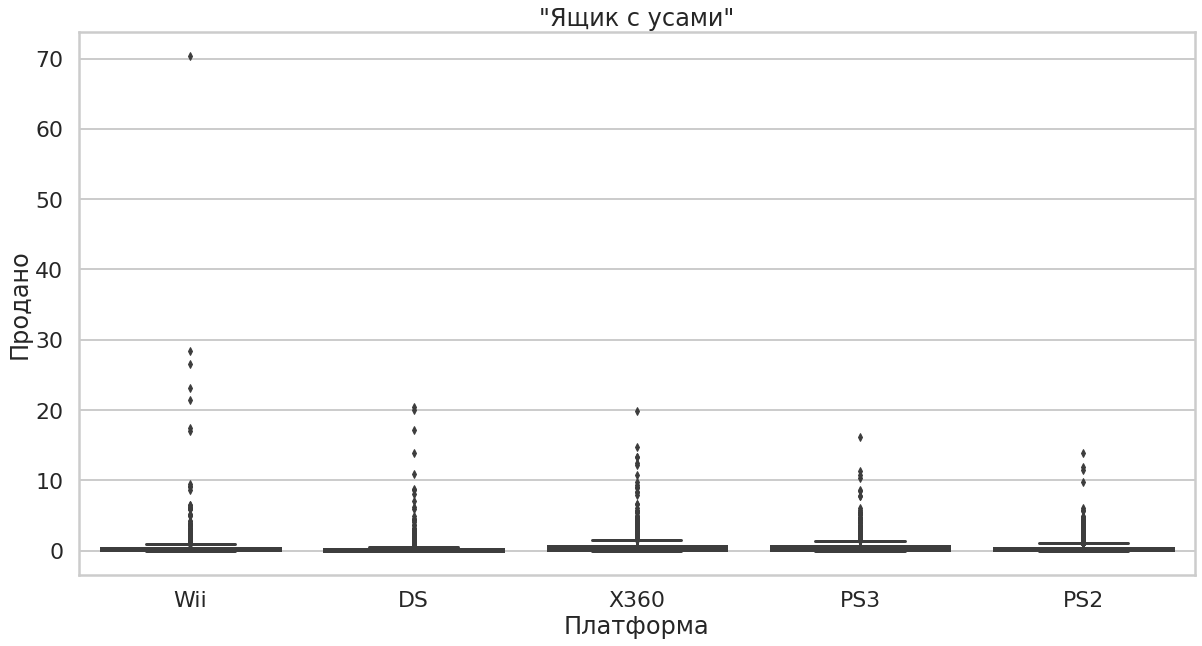

In [69]:
plt.figure(figsize = (20,10))
sns.boxplot(data = top_data, x = 'platform', y='total_sales')
plt.title('"Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Продано')

Избавимся от выбросов

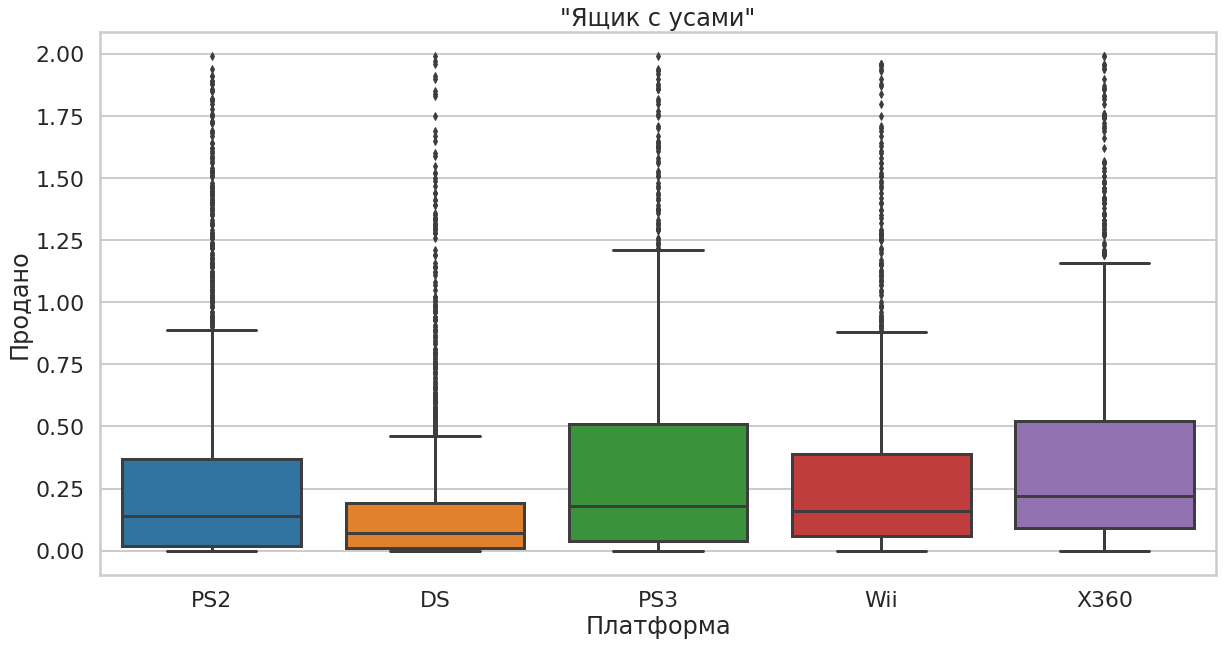

In [72]:
top_data = top_data[top_data['total_sales'] < 2]
plt.figure(figsize = (20,10))
sns.boxplot(data = top_data, x = 'platform', y='total_sales')
plt.title('"Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Продано')
print()

Количество продаж находится в следующей зависимости (отличия весомые):

1.   *PS3*
2.   *X360*
3.   *PS2*
4.   *Wii*
5.   *DS*

Медиана у всех разная и отличие, например, между *PS3* и *DS* явное.

<a name = "step3_5"> </a>

Диаграмма рассеяния и корреляция между отзывами и продажами. Выводы, соотношение с продажами на других платформах

Корреляция между отзывами пользователей и продажами PS2 : 0.1708242088219009
Корреляция между отзывами критиков и продажами PS2 : 0.3920092876834615
Зависимость от оценки критиков сильнее


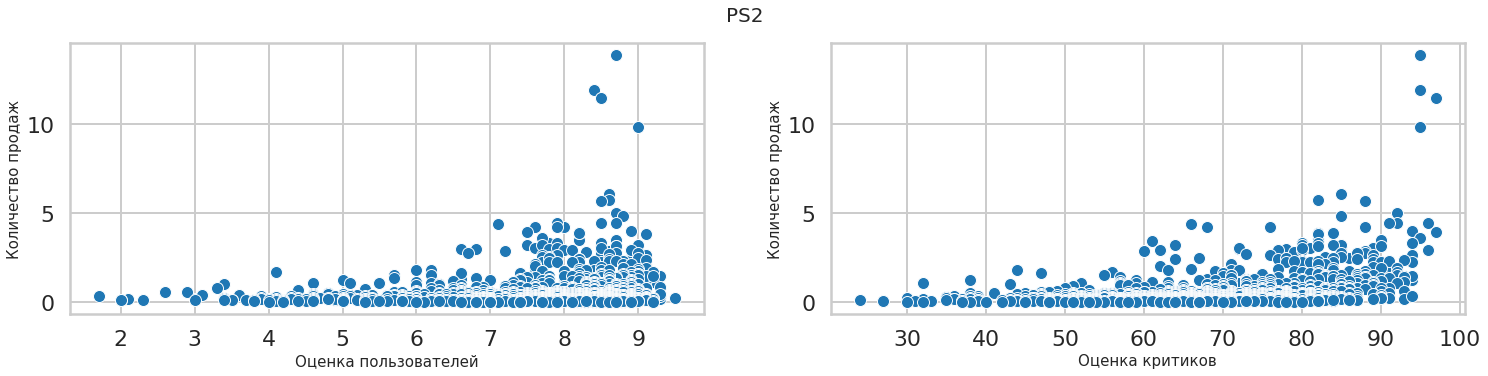

Корреляция между отзывами пользователей и продажами DS : 0.10674510344757826
Корреляция между отзывами критиков и продажами DS : 0.2187917559669851
Зависимость от оценки критиков сильнее


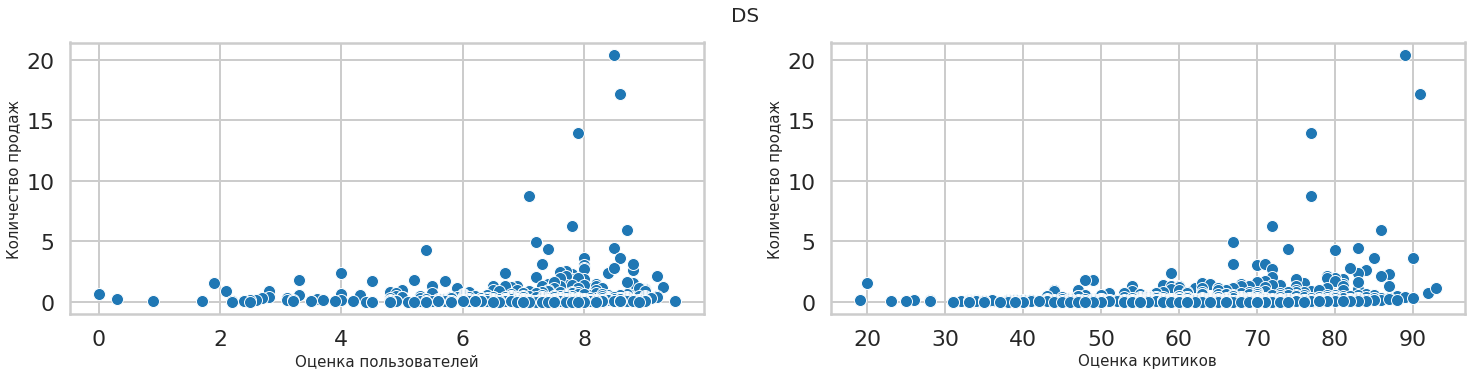

Корреляция между отзывами пользователей и продажами PS3 : 0.11814510389693769
Корреляция между отзывами критиков и продажами PS3 : 0.43782217898687137
Зависимость от оценки критиков сильнее


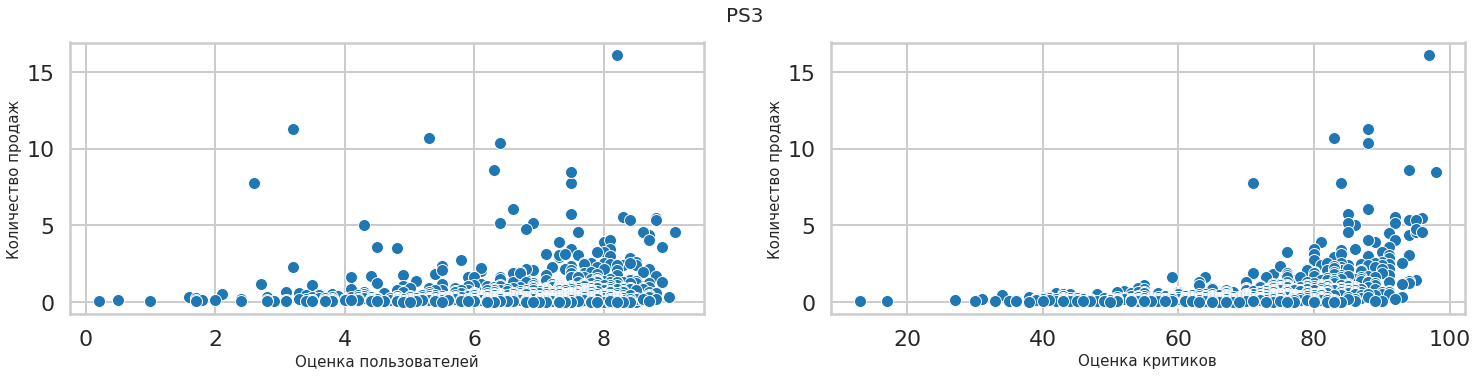

Корреляция между отзывами пользователей и продажами Wii : 0.10965537525416791
Корреляция между отзывами критиков и продажами Wii : 0.1733632085107025
Зависимость от оценки критиков сильнее


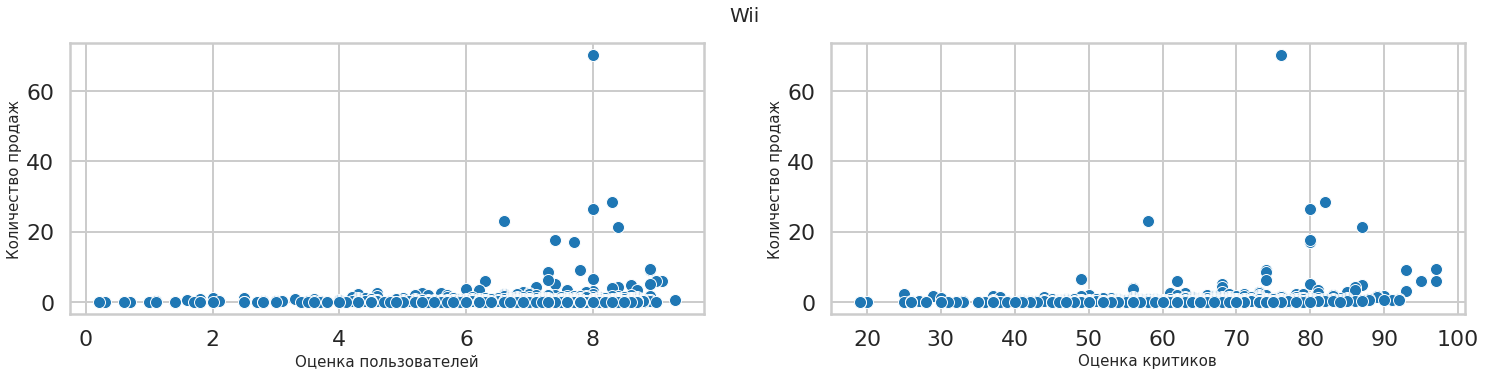

Корреляция между отзывами пользователей и продажами X360 : 0.11125998223780181
Корреляция между отзывами критиков и продажами X360 : 0.3904640265814217
Зависимость от оценки критиков сильнее


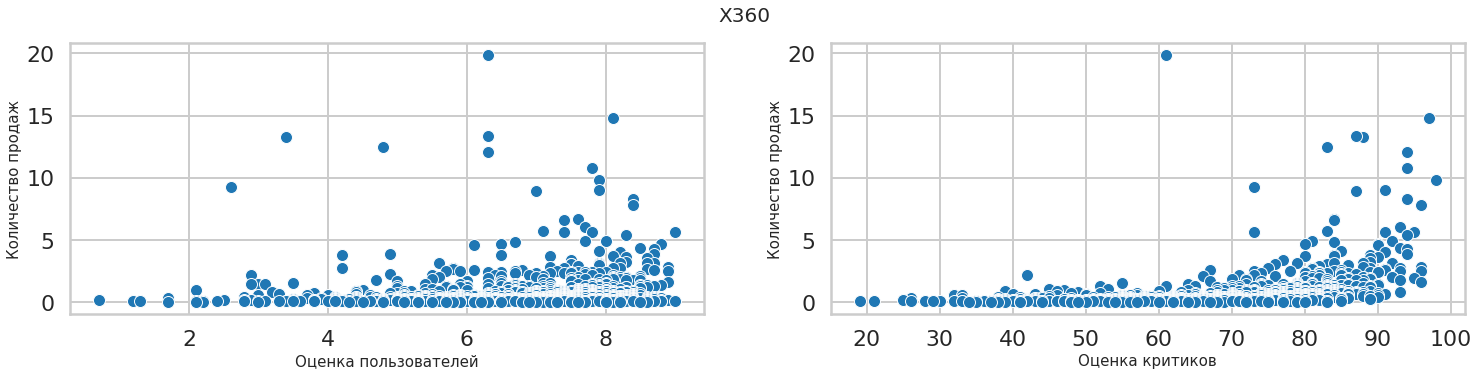

In [120]:
count_user = 0
count_critic = 0
for platform in top_data['platform'].unique():
  corr_user = data[data['platform'] == platform]['user_score'].corr(data['total_sales'])
  corr_critic = data[data['platform'] == platform]['critic_score'].corr(data['total_sales'])
  
  print('Корреляция между отзывами пользователей и продажами',
        platform, ':',
        corr_user)
  print('Корреляция между отзывами критиков и продажами',
        platform, ':',
        corr_critic)
  if (corr_user > corr_critic):
    print("Зависимость от пользовательской оценки сильнее")
    count_user += 1
  else:
    print('Зависимость от оценки критиков сильнее')
    count_critic += 1
  fig, ax = plt.subplots(1, 2, figsize = (25,5))
  sns.scatterplot(x = 'user_score', y = 'total_sales', 
                  data = data[data['platform'] == platform], ax = ax[0])
  sns.scatterplot(x = 'critic_score', y = 'total_sales', 
                  data = data[data['platform'] == platform], ax = ax[1])
  fig.suptitle(platform, fontsize = 20)
  ax[0].set_xlabel('Оценка пользователей', fontsize = 15)
  ax[0].set_ylabel('Количество продаж', fontsize = 15)
  ax[1].set_xlabel('Оценка критиков', fontsize = 15)
  ax[1].set_ylabel('Количество продаж', fontsize = 15)

  plt.show()
  

In [122]:
print('Оценка пользователей сильнее влияет: ',count_user, 
      '\nОценка критиков сильнее влияет', count_critic)

Оценка пользователей сильнее влияет:  0 
Оценка критиков сильнее влияет 5


Для всех платформ присутствует ненулевая корреляция между оценками, как критиков, так и пользователей, и продажами. Оценка пользователей влияет много слабее оценки критиков.

<a name = "step3_6"></a>
Построение распредления игр по жанрам. Мысли о прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами?

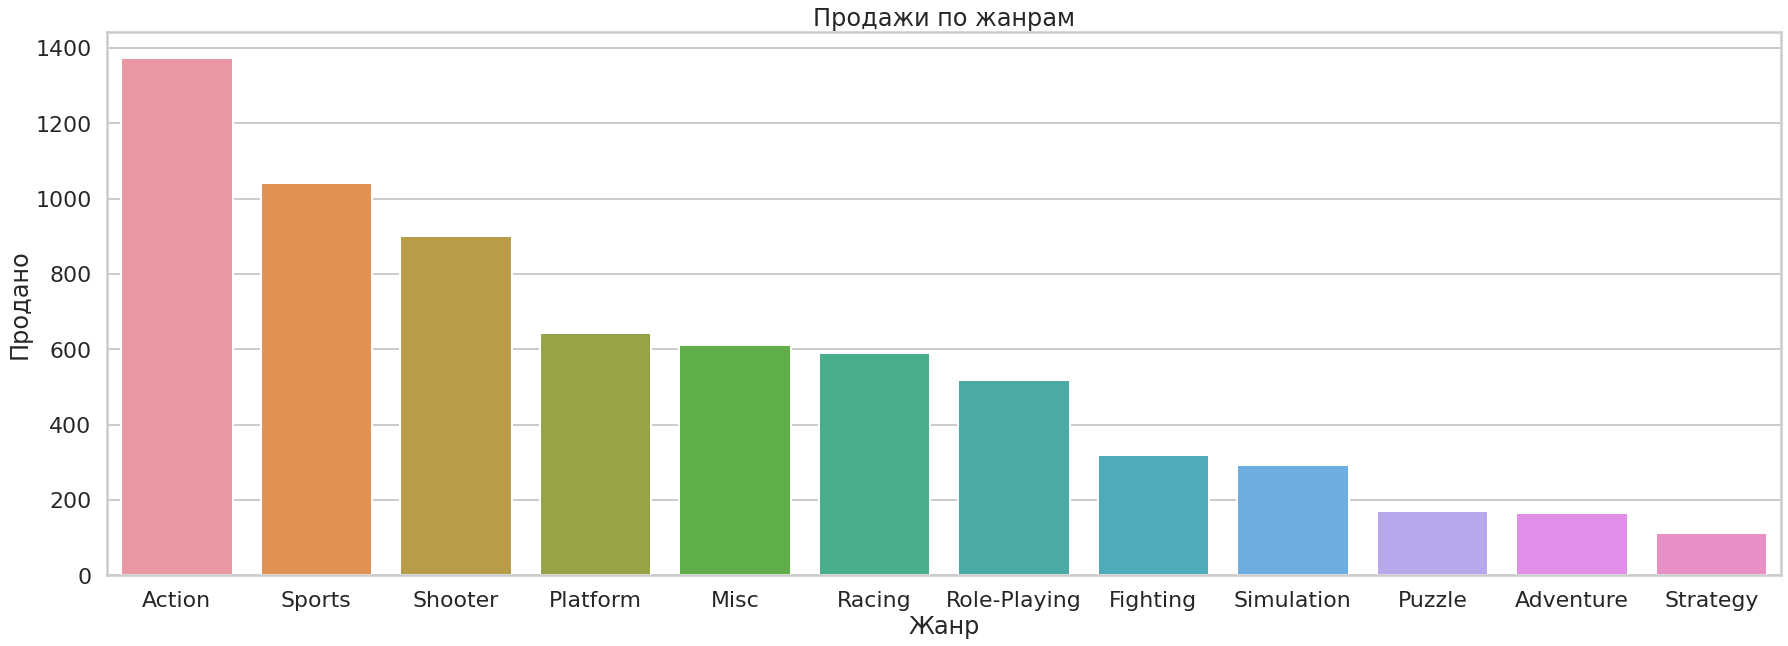

In [127]:
genres = data.pivot_table(index = 'genre',
                          values = 'total_sales',
                          aggfunc = 'sum').sort_values(by = 'total_sales',
                                                       ascending = False).reset_index()
plt.figure(figsize = (30,10))
plt.title('Продажи по жанрам')
sns.barplot(data = genres, x = 'genre', y = 'total_sales')
plt.xlabel('Жанр')
plt.ylabel('Продано')
print()

Лучше всех продаются игры в жанрах *Action, Sports, Shooter*. Тройка аутсайдеров: *Strategy, Adventure, Puzzle*

<a name = "step4"></a>
# Шаг 4. Составим портрет пользователя каждого региона

[К оглавлению](#content)

<a name = "step4_1"></a>
Самые популярные платформы (топ-5)

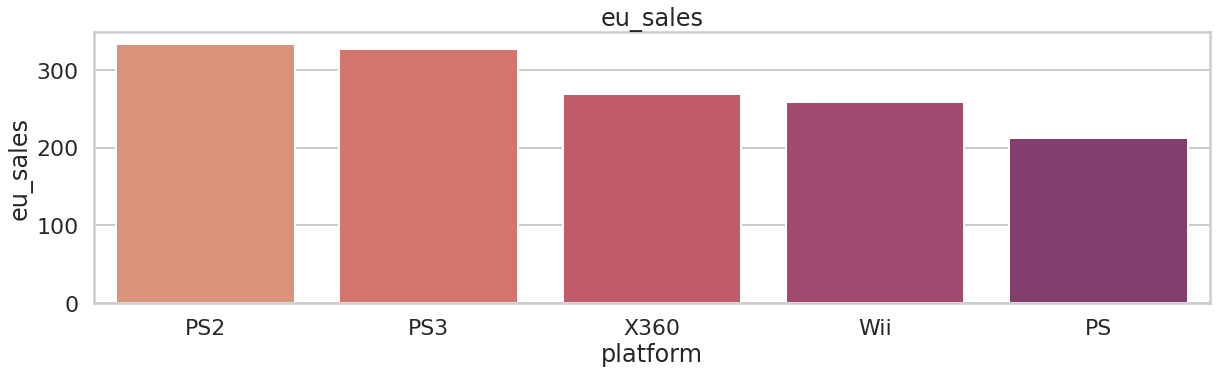

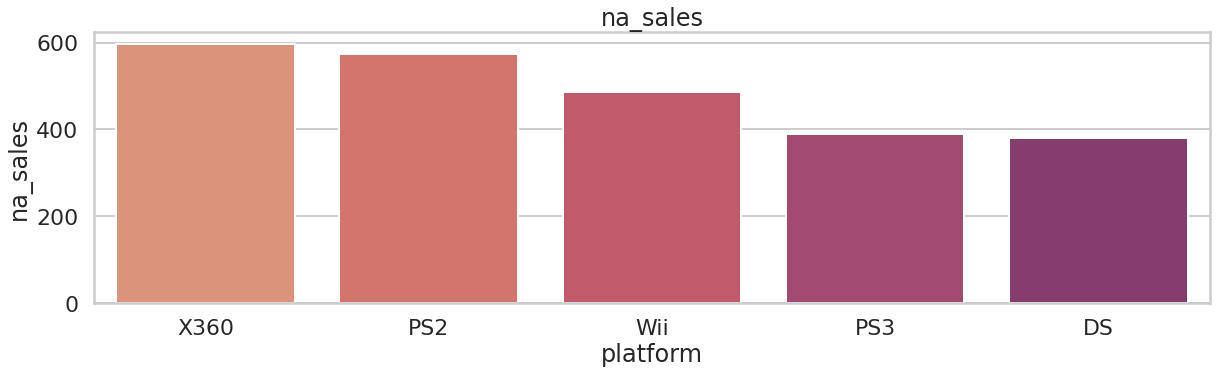

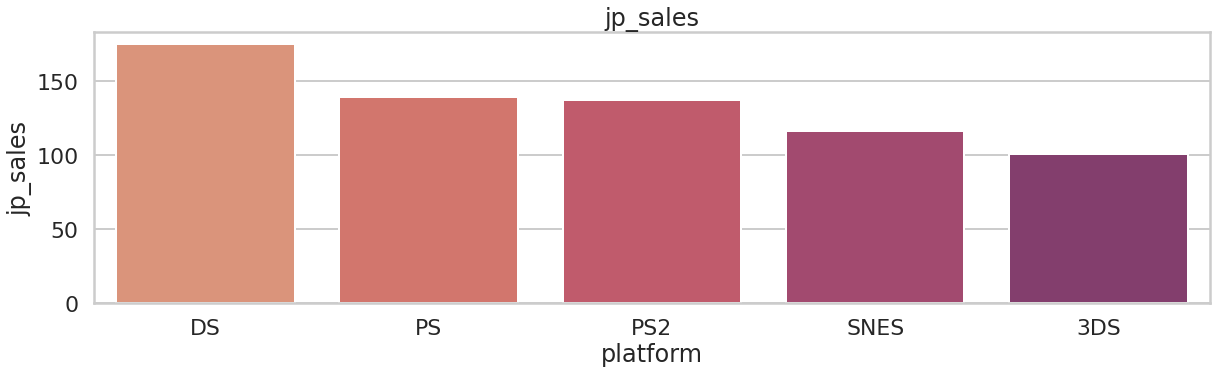

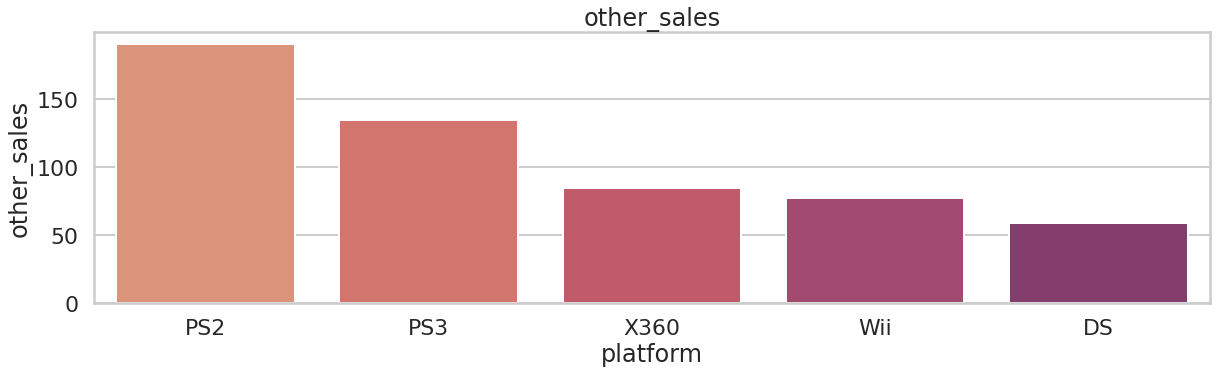

In [181]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
  plt.figure(figsize = (20,5))
  tmp = data.pivot_table(index = 'platform',
                                    values = region,
                                    aggfunc = 'sum').sort_values(by = region,
                                                                 ascending = False).reset_index()
  sns.set_palette('flare')
  sns.barplot(data = tmp.head(), x = 'platform', y = region)
  plt.title(region)
  plt.show()

Самые популярные платформы за всё время: для Америки - X360, для Японии - DS, для Европы и остального мира - PS2

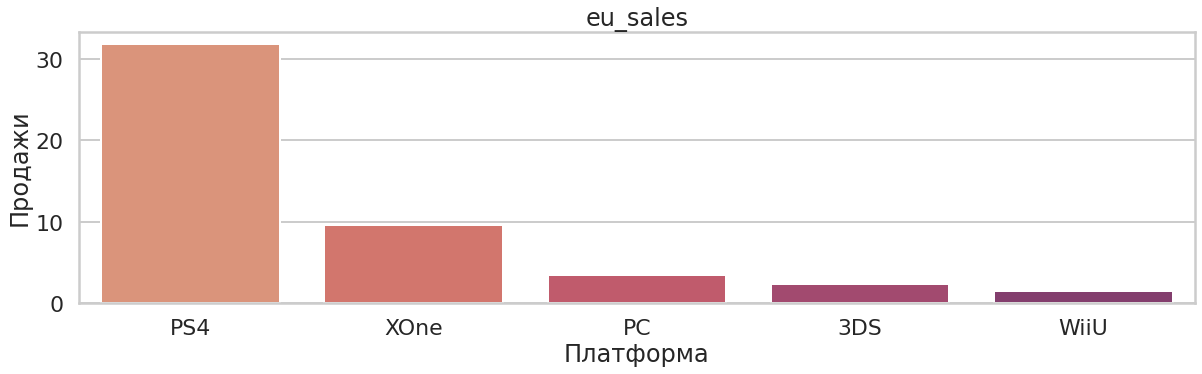

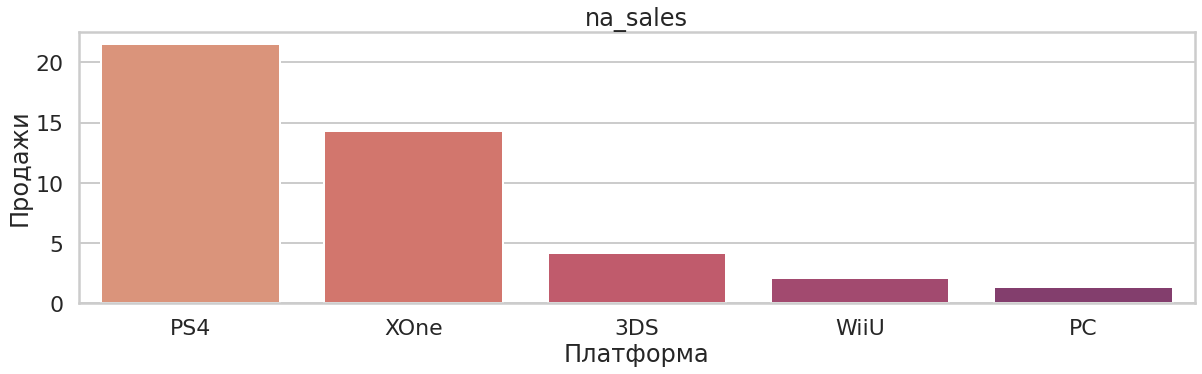

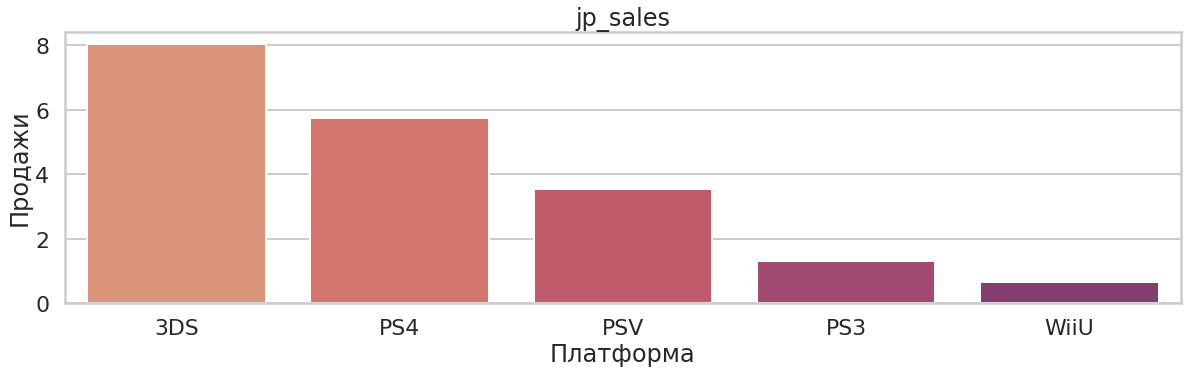

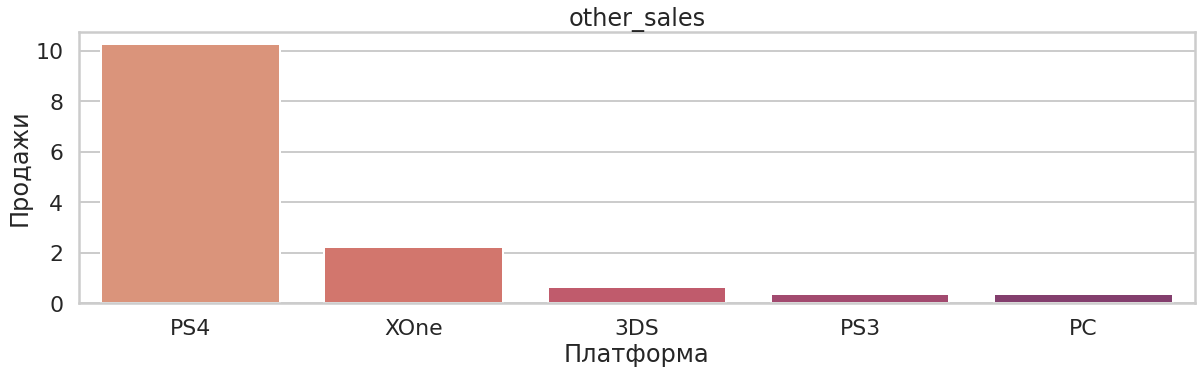

In [180]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
  plt.figure(figsize = (20,5))
  tmp = data[data['year_of_release']> 2015].pivot_table(index = 'platform',
                                    values = region,
                                    aggfunc = 'sum').sort_values(by = region,
                                                                 ascending = False).reset_index()
  sns.set_palette('flare')
  sns.barplot(data = tmp.head(), x = 'platform', y = region)
  plt.xlabel('Платформа')
  plt.ylabel('Продажи')
  plt.title(region)
  plt.show()

Самые популярные платформы на 2016 год: для Европы, Америки и остального мира - PS4, для японии - 3DS
Можно судить о некой универсальности PS4, раз ей пользуются в таких пропорциях везде, кроме Японии. Думаю, лучшим объяснением такого выбора японцев будет следующий пункт, где произойдет разделение на жанры.


<a name = "step4_2"></a>
Самые популярные жанры (топ-5). Поясните разницу

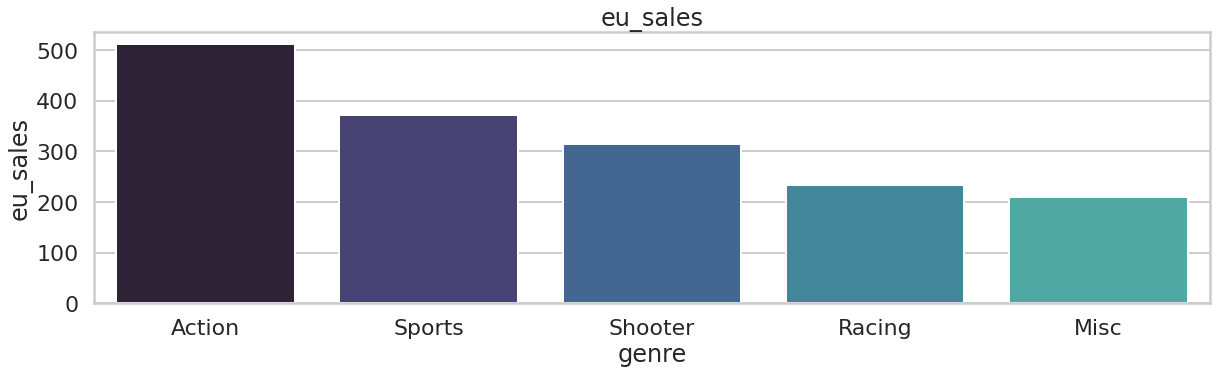

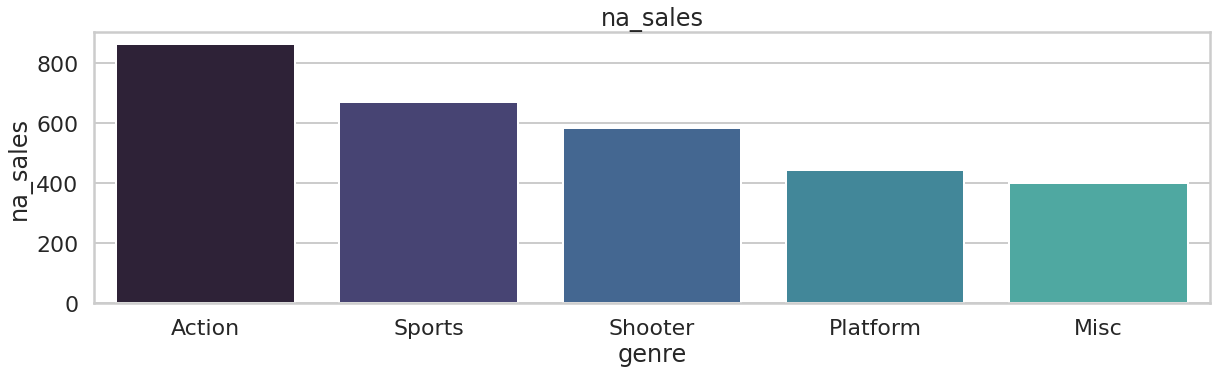

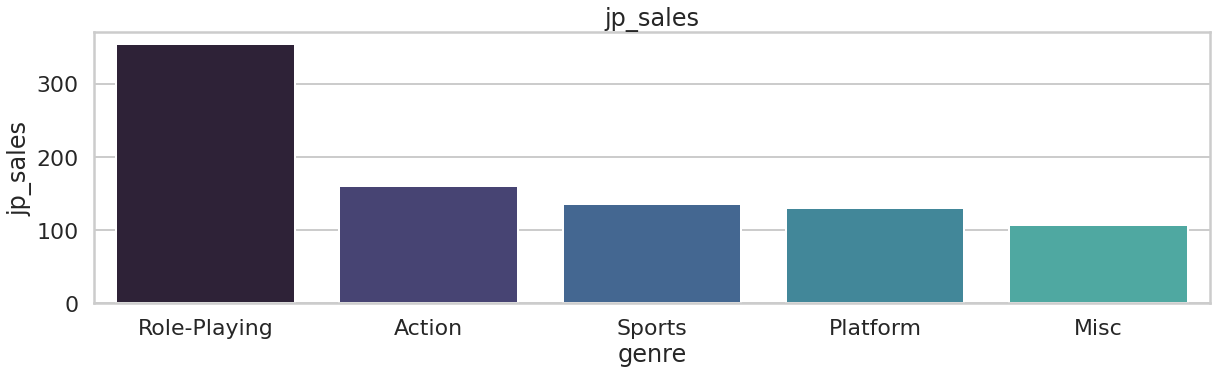

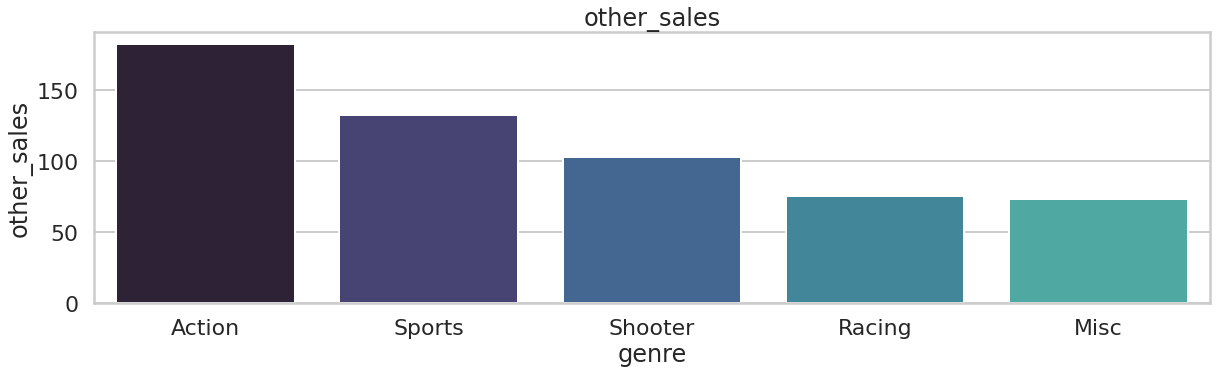

In [177]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
  plt.figure(figsize = (20,5))
  tmp = data.pivot_table(index = 'genre',
                                    values = region,
                                    aggfunc = 'sum').sort_values(by = region,
                                                                 ascending = False).reset_index()
  sns.set_palette('mako')
  sns.barplot(data = tmp.head(), x = 'genre', y = region)
  plt.title(region)
  plt.show()

Для всего мира, кроме Япония, предпочтительным жанром является *Action*. Для японии *Action* на втором месте по популярности, на первом - *Role-Playing*. Видимо, именно такой жанр предпочитают и производители игр под популярные в этом регионе платформы. 

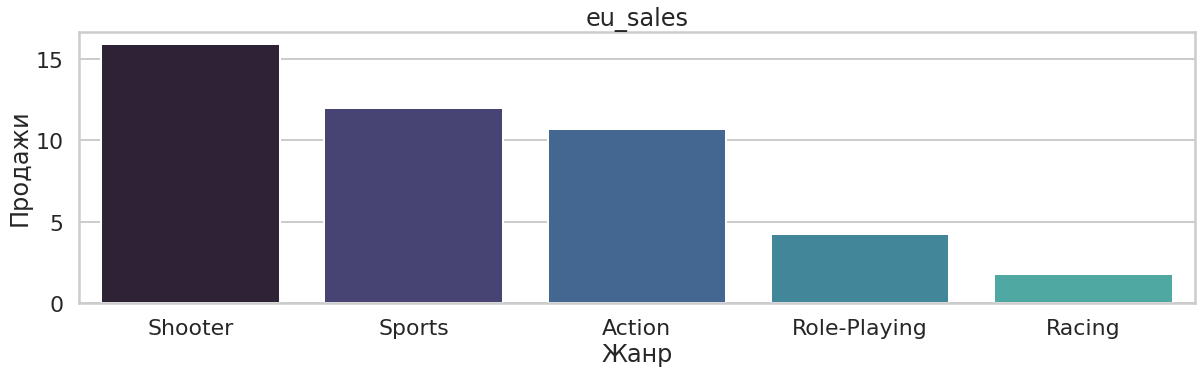

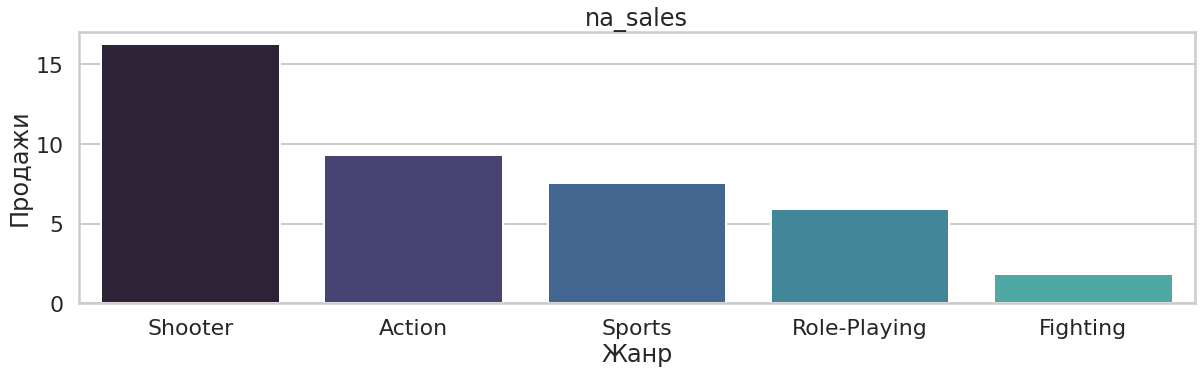

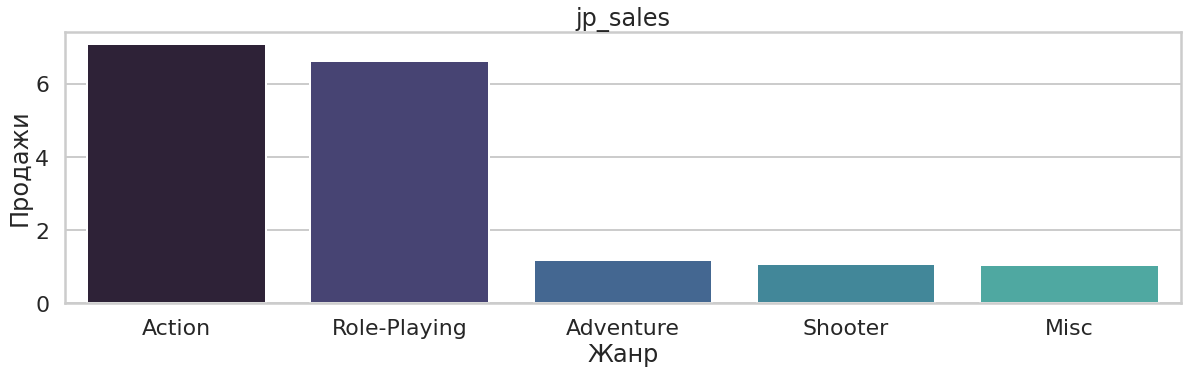

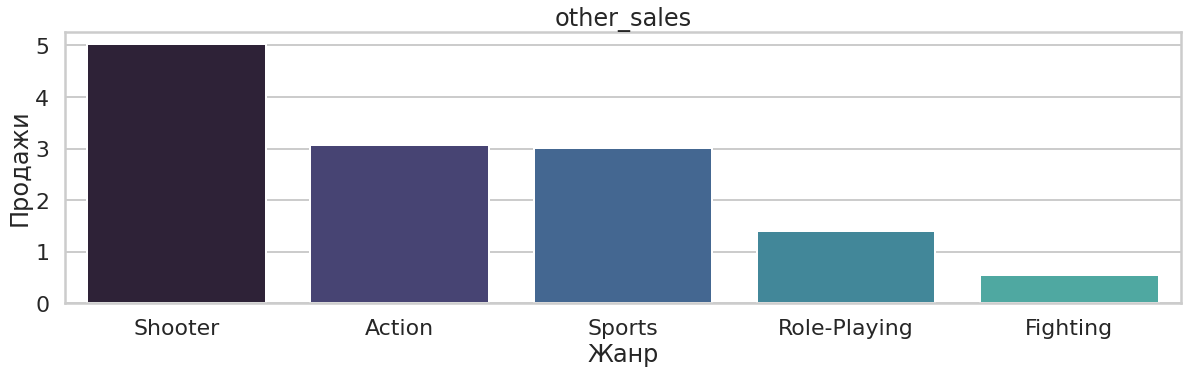

In [176]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
  plt.figure(figsize = (20,5))
  tmp = data[data['year_of_release']> 2015].pivot_table(index = 'genre',
                                    values = region,
                                    aggfunc = 'sum').sort_values(by = region,
                                                                 ascending = False).reset_index()
  sns.set_palette('mako')
  sns.barplot(data = tmp.head(), x = 'genre', y = region)
  plt.xlabel('Жанр')
  plt.ylabel('Продажи')
  plt.title(region)
  plt.show()

В последний год весь мир, опять же, кроме Японии, сместил интерес в сторону жанра *Shooter*. В Японии начинает набирать популярность жанр *Action*

 <a name = "step4_3"></a>
 Влияет ли рейтинг рейтинг ESRB на продажи в отдельном регионе?

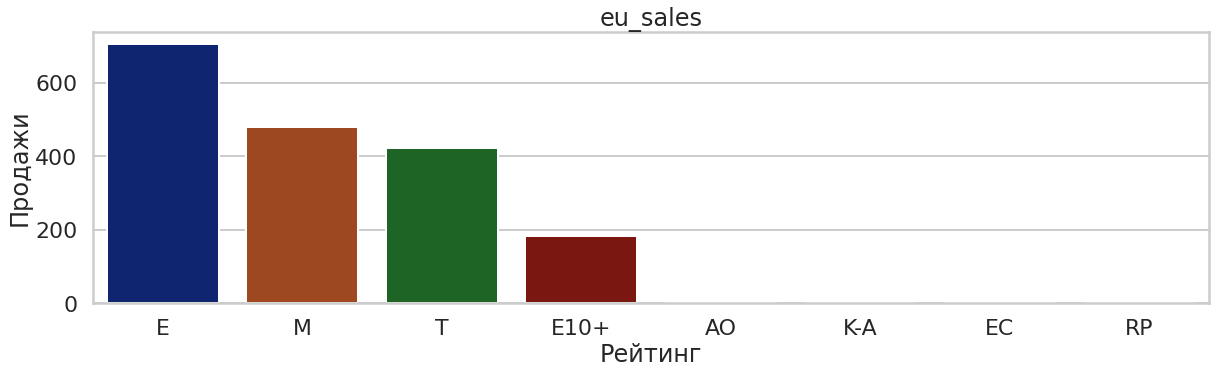

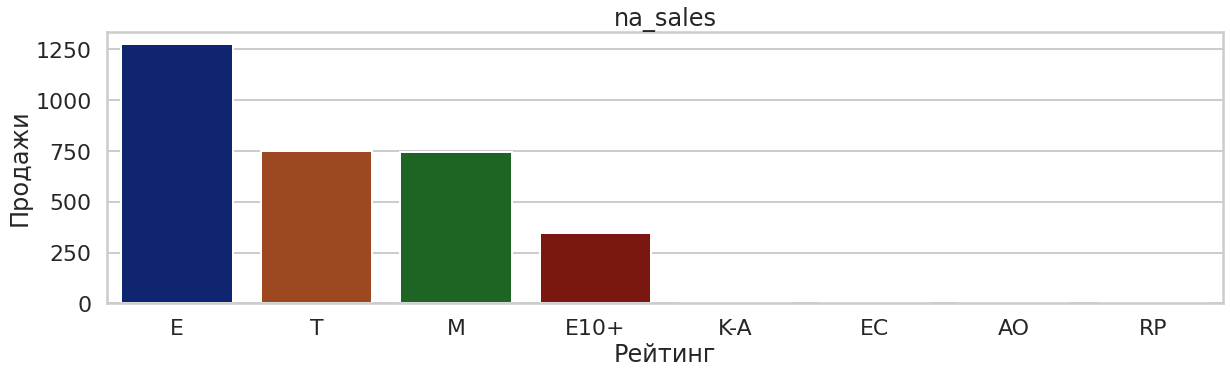

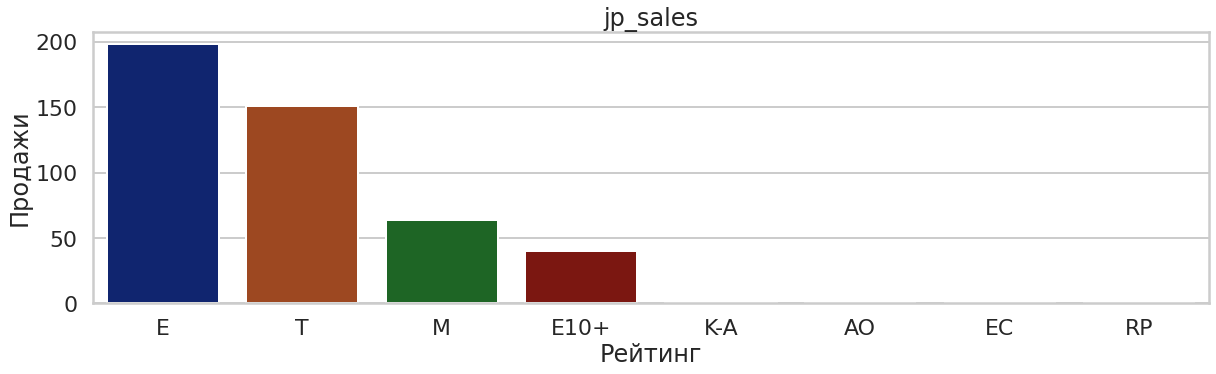

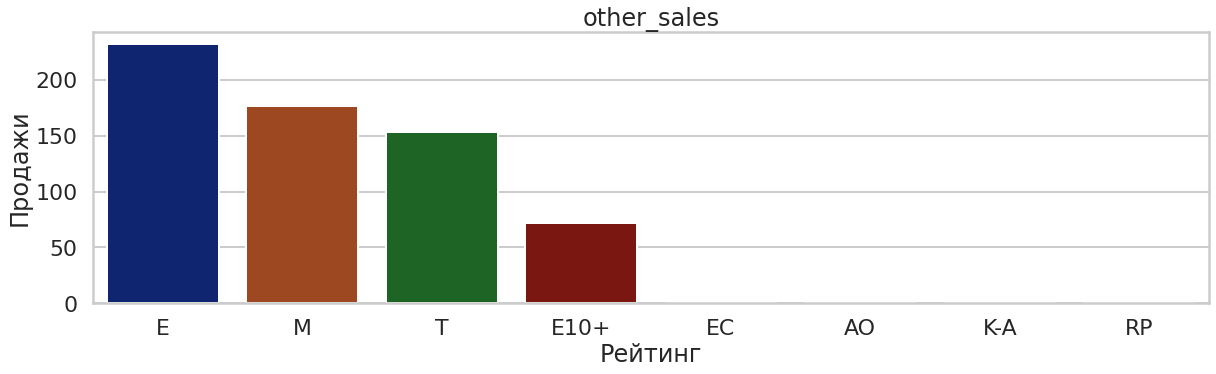

In [200]:
for region in ['eu_sales', 'na_sales', 'jp_sales', 'other_sales']:
  plt.figure(figsize = (20,5))
  tmp = data.pivot_table(index = 'rating',
                         values = region,
                         aggfunc = 'sum').sort_values(by = region,
                                                      ascending = False).reset_index()
  sns.set_palette('dark')
  sns.barplot(data = tmp, x = 'rating', y = region)
  plt.xlabel('Рейтинг')
  plt.ylabel('Продажи')
  plt.title(region)
  plt.show()

Рейтинг влияет. В Европе ситуация подобна всему миру, а Америка подобна Японии, однако любые другие комбинации пар с точностью до перестановок показывают зависимость продаж в отдельном регионе от конкретного рейтинга.

<a name = "step5"></a>
# Шаг 5. Проведите исследование статистических показателей

[К оглавлению](#content)

Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Среднее количество, дисперсия и стандартное отклонение. Гистограмма. Описание распределения.

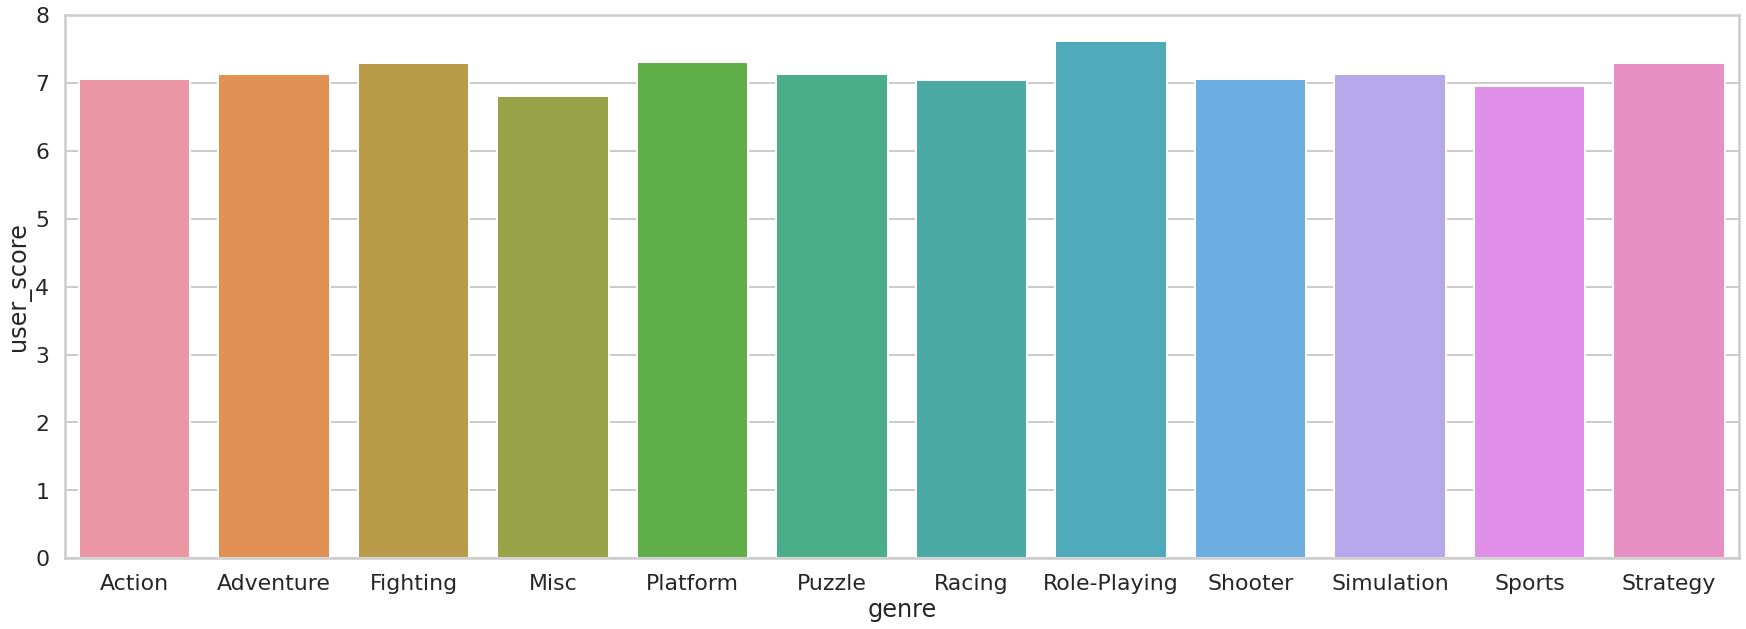

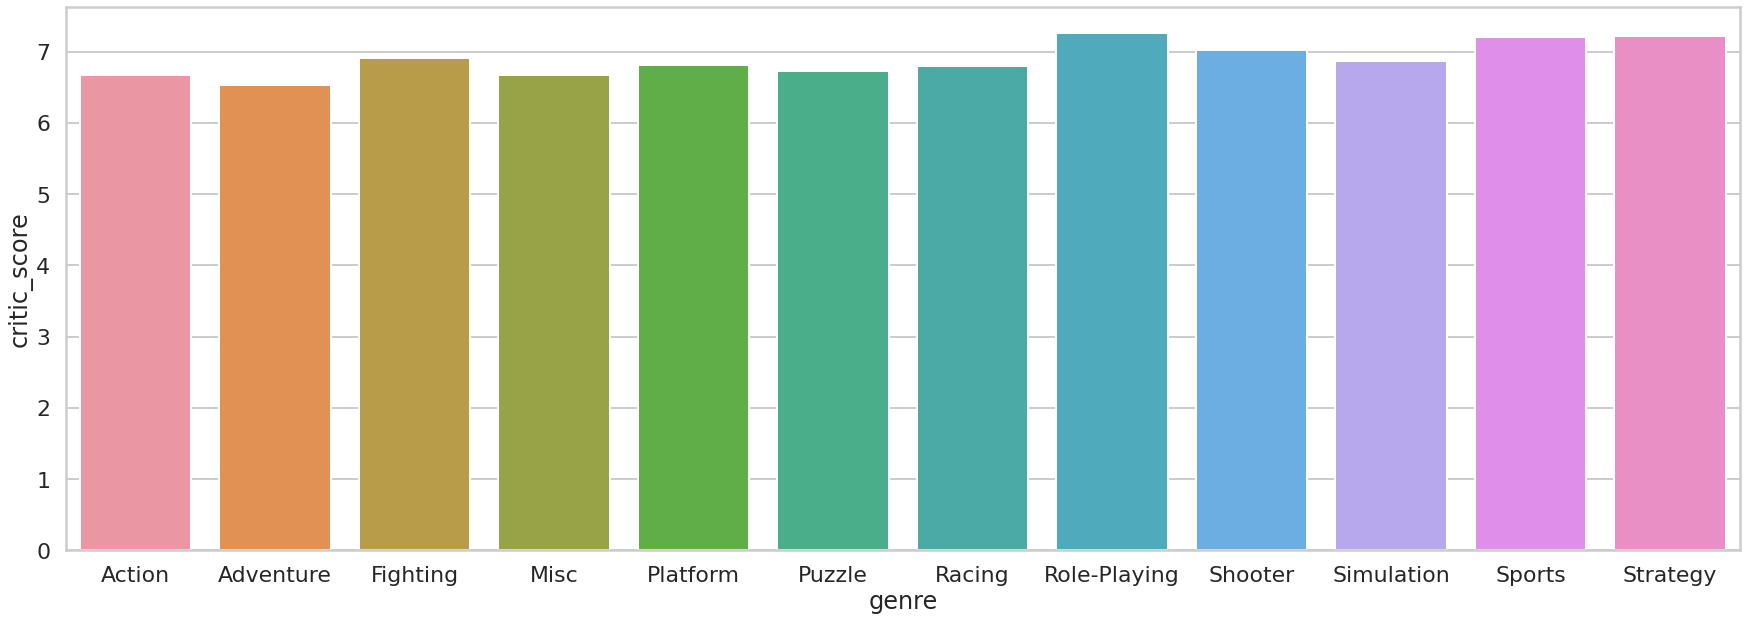

In [211]:
#data['critic_score'] = data['critic_score'] / 10 #привел к одному формату рейтинги, чтобы легче понимать было
for score in ['user_score', 'critic_score']:
  tmp = data.pivot_table(index = 'genre', values = score)
  plt.figure(figsize = (30,10))
  sns.barplot(data = tmp, x = tmp.index, y = score)

Каких-то критических изменений я не вижу, в целом, критики ставят оценки в переводе в 10-бальную систему более низкие, чем пользователи, кроме жанра *Sports*

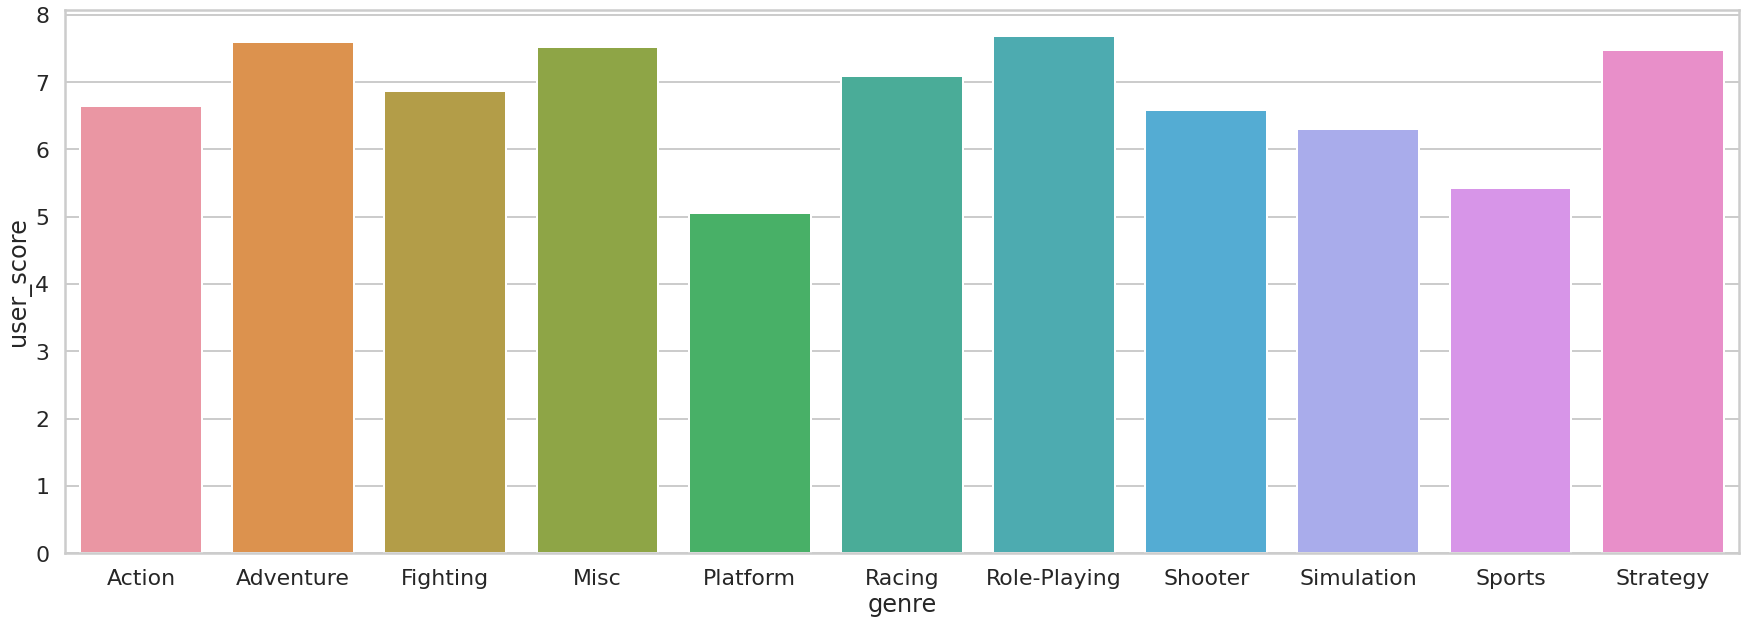

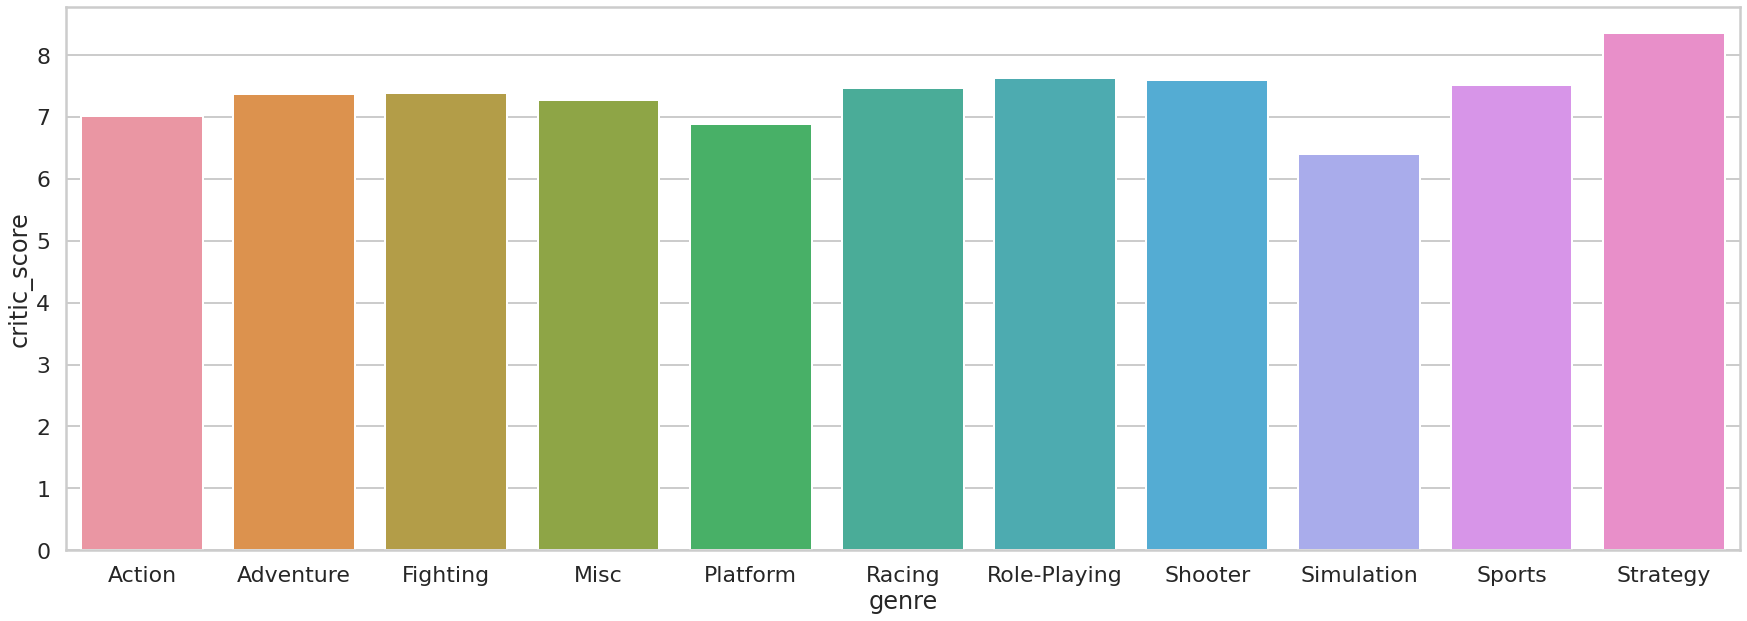

In [212]:
for score in ['user_score', 'critic_score']:
  tmp = data[data['year_of_release'] > 2015].pivot_table(index = 'genre', values = score)
  plt.figure(figsize = (30,10))
  sns.barplot(data = tmp, x = tmp.index, y = score)

А вот в последнем году пользователи уже начали сильнее расходиться в рецензировании с критиками.

In [224]:
for genre in data['genre'].unique():
  print("(Пользовательский рейтинг)\nСреднее жанра", genre, "равно", np.mean(data[data['genre'] == genre]['user_score']))
  print("Дисперсия жанра", genre, "равна", np.var(data[data['genre'] == genre]['user_score']))
  print("Стандартное отклонение жанра", genre, "равна", np.std(data[data['genre'] == genre]['user_score']))
  print("---------------------------------------------------\n(Рейтинг критиков)")  
 
  print("Среднее жанра", genre, "равно", np.mean(data[data['genre'] == genre]['critic_score']))
  print("Дисперсия жанра", genre, "равна", np.var(data[data['genre'] == genre]['critic_score']))
  print("Стандартное отклонение жанра", genre, "равна", np.std(data[data['genre'] == genre]['critic_score']))
  
  print("===================================================")

(Пользовательский рейтинг)
Среднее жанра Sports равно 6.951433857539316
Дисперсия жанра Sports равна 2.6206293039045394
Стандартное отклонение жанра Sports равна 1.6188357865776688
---------------------------------------------------
(Рейтинг критиков)
Среднее жанра Sports равно 7.1993133047210325
Дисперсия жанра Sports равна 1.9356390134281327
Стандартное отклонение жанра Sports равна 1.3912724439979873
(Пользовательский рейтинг)
Среднее жанра Platform равно 7.3058962264150935
Дисперсия жанра Platform равна 2.2791869326272707
Стандартное отклонение жанра Platform равна 1.5096976295362163
---------------------------------------------------
(Рейтинг критиков)
Среднее жанра Platform равно 6.812448979591833
Дисперсия жанра Platform равна 1.739742982090793
Стандартное отклонение жанра Platform равна 1.3189931698423587
(Пользовательский рейтинг)
Среднее жанра Racing равно 7.040858505564395
Дисперсия жанра Racing равна 2.3980285157503913
Стандартное отклонение жанра Racing равна 1.54855691395

Самую низкую среднюю оценку среди критиков имеет жанр *Adventure*, среди пользователей жанр *Misc* не в почете. Самую высокую среди пользователей и критиков (сошлись во мнении) *Role-Playing*

<a name = 'step6'> </a>

# Шаг 6. Проверка гипотез

[К оглавлению](#content)

<a name = step6_1></a>
Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые

$H_0: $ Средние пользовательские рейтинги платформ одинаковы

$H_1: $ Средние пользовательские рейтинги разные

$\alpha = 0.05$, t-критерий Стьюдента в силу независимости

In [227]:
def check(value, alpha = 0.05):
  print('p-значение = ', value)
  if value < alpha:
    print("Отвергаем нулевую гипотезу")
  else:
    print("Не отвергаем нулевую гипотезу")

In [246]:
tmp1 = data[data['platform'] == 'XOne']['user_score'].dropna()
tmp2 = data[data['platform'] == 'PC']['user_score'].dropna()
tmp = st.ttest_ind(tmp1, tmp2)
check(tmp.pvalue)

p-значение =  1.3037979620149106e-05
Отвергаем нулевую гипотезу


<a name = step6_2></a>
 Средние пользовательские рейтинги жанров *Action* и *Sports* разные

$H_0: $ Средние пользовательские рейтинги жанров *Action* и *Sports* одинаковые

$H_1: $ Средние пользовательские рейтинги жанров *Action* и *Sports* различаются

$alpha = 0.05$, t-критерий Стьюдента в силу независимости

In [240]:
tmp1 = data[data['genre'] == 'Action']['user_score'].dropna()
tmp2 = data[data['genre'] == 'Sports']['user_score'].dropna()
tmp = st.ttest_ind(tmp1, tmp2)
check(tmp.pvalue)

p-значение =  0.06480928064420527
Не отвергаем нулевую гипотезу


<a name = "step7"></a>
# Шаг 7. Финал

Проделана долгая работа, состоящая из: преобработки данных, исследовательского и стаститического анализов. В результате работы было сделано:
*  Выяснены популярные платформы за весь период, за последний год, среди конкретных регионов
* Оценена продолжительность существования платформы на рынке
* Найдена зависимость между продажами и оценками. Определена более сильная зависимость от оценок критиков, как следствие, получено понимание, что пользователи в меньшей степени доверяют другим пользователям, нежели критикам.
* Определены популярны жанры, как повсеместно, так и отдельно по регионам.
* Получены данные, которые можно привести к выводу о самых перспективных платформах и жанрах на 2016 год - PS4, XOne, 3DS и *Shooter*, соответственно.
* Проверены поставленные гипотезы
* Выяснены в среднем любимый и в среднем нелюбимый жанры: *Role-Playing*, *Adventure, Misc* соответственно